# DATA5000 Workshop 12

## Causal Machine Learning and Predictions

## The DGEA Economic Dataset

#### - Apply ML: correlations - SHAP
#### - Causal ML: predict causal factors
#### - Predict Treatment Effects, Policies
#### - Forecast: Causal Fusion vs Baseline NeuralProphet

In [ ]:
%pip install econml shap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 18.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.9/532.9 kB 17.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 237.3/237.3 kB 9.7 MB/s eta 0:00:00


In [ ]:
%pip install pandas numpy matplotlib seaborn sklearn plotly openpyxl numba lightgbm nbformat

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [ ]:
%matplotlib inline

In [ ]:
import pandas as pd
import numpy as np
from openpyxl import Workbook

# DATASETS

In [ ]:
dgea_dataset_url = 'https://s3.ap-southeast-2.wasabisys.com/data5000/dgea_economic_timeseries_all_dates.xlsx'

In [ ]:
dgea_timeseries_all = pd.read_excel('https://s3.ap-southeast-2.wasabisys.com/data5000/dgea_economic_timeseries_all_dates.xlsx')
dgea_timeseries_all

,Datetime,AUS_BROAD_MONEY_DMABMN,AUS_CASHRATE_ARBAMPCNCRT,AUS_CASHRATE_CHANGE_ARBAMPCCCR,AUS_CPI_MONTHLY,AUS_CURRENCY_DMACN,AUS_DMAM1N,AUS_DMAM3N,AUS_DMAMMB,AUS_EMPLOY_TOPOP_PERCENT,...,GOLD_ADJCLOSE,GOLD_CLOSE,GOLD_HIGH,GOLD_LOW,GOLD_OPEN,GOLD_VOLUME,IRONORE_PRICE,SILVER_PRICE,US_FEDFUNDS,WTI
0,1954-07-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.80,NaN
1,1954-08-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.22,NaN
2,1954-09-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.07,NaN
3,1954-10-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.85,NaN
4,1954-11-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.83,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2663,2023-10-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1927.4,1927.4,1930.1,1877.5,1877.5,43,NaN,NaN,NaN,NaN
2664,2023-10-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1921.1,1921.1,1921.1,1910.3,1910.4,53,NaN,NaN,NaN,NaN
2665,2023-10-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1922.7,1922.7,1925.8,1914.3,1914.3,103,NaN,NaN,NaN,NaN
2666,2023-10-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1955.3,1955.3,1957.9,1935.0,1935.0,67,NaN,NaN,NaN,NaN


In [ ]:
dgea_timeseries_all.columns

Index(['Datetime', 'AUS_BROAD_MONEY_DMABMN', 'AUS_CASHRATE_ARBAMPCNCRT',
       'AUS_CASHRATE_CHANGE_ARBAMPCCCR', 'AUS_CPI_MONTHLY',
       'AUS_CURRENCY_DMACN', 'AUS_DMAM1N', 'AUS_DMAM3N', 'AUS_DMAMMB',
       'AUS_EMPLOY_TOPOP_PERCENT', 'AUS_EMPLOY_TOPOP_TREND', 'AUS_GNI_CAP',
       'AUS_GNI_TOT', 'AUS_PARTICIPATION_RATE',
       'AUS_PARTICIPATION_RATE_FEMALES', 'AUS_PARTICIPATION_RATE_MALES',
       'AUS_UNEMPLOY_PERSONS_PERCENT', 'AUS_UNEMPLOY_PERSONS_PERCENT_FEMALES',
       'AUS_UNEMPLOY_PERSONS_PERCENT_MALES', 'BRENT', 'COPPER_PRICE',
       'GOLD_ADJCLOSE', 'GOLD_CLOSE', 'GOLD_HIGH', 'GOLD_LOW', 'GOLD_OPEN',
       'GOLD_VOLUME', 'IRONORE_PRICE', 'SILVER_PRICE', 'US_FEDFUNDS', 'WTI'],
      dtype='object')

In [ ]:
dgea_timeseries_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2668 entries, 0 to 2667
Data columns (total 31 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   Datetime                              2668 non-null   datetime64[ns]
 1   AUS_BROAD_MONEY_DMABMN                565 non-null    float64       
 2   AUS_CASHRATE_ARBAMPCNCRT              90 non-null     float64       
 3   AUS_CASHRATE_CHANGE_ARBAMPCCCR        90 non-null     float64       
 4   AUS_CPI_MONTHLY                       49 non-null     float64       
 5   AUS_CURRENCY_DMACN                    770 non-null    float64       
 6   AUS_DMAM1N                            583 non-null    float64       
 7   AUS_DMAM3N                            770 non-null    float64       
 8   AUS_DMAMMB                            583 non-null    float64       
 9   AUS_EMPLOY_TOPOP_PERCENT              121 non-null    float64       
 10  

In [ ]:
dgea_timeseries_all.describe()

,Datetime,AUS_BROAD_MONEY_DMABMN,AUS_CASHRATE_ARBAMPCNCRT,AUS_CASHRATE_CHANGE_ARBAMPCCCR,AUS_CPI_MONTHLY,AUS_CURRENCY_DMACN,AUS_DMAM1N,AUS_DMAM3N,AUS_DMAMMB,AUS_EMPLOY_TOPOP_PERCENT,...,COPPER_PRICE,GOLD_ADJCLOSE,GOLD_CLOSE,GOLD_HIGH,GOLD_LOW,GOLD_OPEN,IRONORE_PRICE,SILVER_PRICE,US_FEDFUNDS,WTI
count,2668,565.000000,90.000000,90.000000,49.000000,770.000000,583.000000,770.000000,583.000000,121.000000,...,520.000000,1063.000000,1063.000000,1063.000000,1063.000000,1063.000000,520.000000,664.000000,831.000000,520.000000
mean,2002-05-10 01:23:39.490254848,865.598446,5.195000,-0.154444,3.563265,24.765436,323.449103,597.285379,63.825063,61.987603,...,4046.742308,1786.424083,1786.424083,1795.378457,1777.246378,1786.202070,46.201981,10.085392,4.599037,44.543058
min,1954-07-01 00:00:00,49.989000,0.100000,-1.500000,-0.200000,0.765000,8.464000,6.710000,4.092000,58.100000,...,1272.000000,1420.900000,1420.900000,1445.200000,1400.900000,1411.300000,10.510000,1.310000,0.050000,10.430000
25%,1984-10-23 12:00:00,255.526000,3.250000,-0.500000,1.600000,2.463000,28.681500,29.386750,13.966000,61.000000,...,1746.750000,1720.450000,1720.450000,1728.850000,1709.600000,1719.250000,12.270000,4.637500,1.780000,20.577500
50%,2010-03-31 12:00:00,534.068000,4.750000,-0.250000,3.100000,14.750000,115.803000,229.454500,30.237000,61.800000,...,2741.500000,1806.600000,1806.600000,1813.400000,1798.500000,1804.400000,14.050000,6.125000,4.160000,33.330000
75%,2021-03-18 06:00:00,1429.874000,6.187500,0.250000,5.700000,38.383000,441.513500,892.520000,56.967000,62.600000,...,6521.000000,1897.700000,1897.700000,1907.000000,1885.000000,1897.000000,71.787500,15.440000,6.245000,63.532500
max,2023-10-19 00:00:00,2920.797000,17.500000,1.000000,8.400000,101.572000,1690.290000,2903.546000,574.840000,64.500000,...,10337.000000,2051.500000,2051.500000,2072.000000,2040.000000,2053.600000,214.550000,48.700000,19.100000,140.000000
std,NaN,795.164447,3.424048,0.513177,2.544086,27.522061,424.753310,782.580931,110.941763,1.323101,...,2641.625989,143.075884,143.075884,143.445037,142.849201,143.087572,48.889922,8.125607,3.598657,28.014949


In [ ]:
dgea_columns = ['Datetime', 'AUS_BROAD_MONEY_DMABMN', 'AUS_CASHRATE_ARBAMPCNCRT',
       'AUS_CASHRATE_CHANGE_ARBAMPCCCR', 'AUS_CPI_MONTHLY',
       'AUS_CURRENCY_DMACN', 'AUS_DMAM1N', 'AUS_DMAM3N', 'AUS_DMAMMB',
       'AUS_EMPLOY_TOPOP_PERCENT', 'AUS_EMPLOY_TOPOP_TREND', 'AUS_GNI_CAP',
       'AUS_GNI_TOT', 'AUS_PARTICIPATION_RATE',
       'AUS_PARTICIPATION_RATE_FEMALES', 'AUS_PARTICIPATION_RATE_MALES',
       'AUS_UNEMPLOY_PERSONS_PERCENT', 'AUS_UNEMPLOY_PERSONS_PERCENT_FEMALES',
       'AUS_UNEMPLOY_PERSONS_PERCENT_MALES', 'BRENT', 'COPPER_PRICE',
       'GOLD_ADJCLOSE', 'GOLD_CLOSE', 'GOLD_HIGH', 'GOLD_LOW', 'GOLD_OPEN',
       'GOLD_VOLUME', 'IRONORE_PRICE', 'SILVER_PRICE', 'US_FEDFUNDS', 'WTI']

## Re-order columns and drop some columns

In [ ]:
['Datetime',
 'AUS_BROAD_MONEY_DMABMN',
 'AUS_CASHRATE_ARBAMPCNCRT',
 'AUS_CASHRATE_CHANGE_ARBAMPCCCR',
 'AUS_CPI_MONTHLY',
 'AUS_CURRENCY_DMACN',
 'AUS_DMAM1N',
 'AUS_DMAM3N',
 'AUS_DMAMMB',
 'AUS_EMPLOY_TOPOP_PERCENT',
 'AUS_EMPLOY_TOPOP_TREND',
 'AUS_GNI_CAP',
 'AUS_GNI_TOT',
 'AUS_PARTICIPATION_RATE',
 'AUS_PARTICIPATION_RATE_FEMALES',
 'AUS_PARTICIPATION_RATE_MALES',
 'AUS_UNEMPLOY_PERSONS_PERCENT',
 'AUS_UNEMPLOY_PERSONS_PERCENT_FEMALES',
 'AUS_UNEMPLOY_PERSONS_PERCENT_MALES',
 'BRENT',
 'COPPER_PRICE',
 'GOLD_ADJCLOSE',
 'GOLD_CLOSE',
 'GOLD_HIGH',
 'GOLD_LOW',
 'GOLD_OPEN',
 'GOLD_VOLUME',
 'IRONORE_PRICE',
 'SILVER_PRICE',
 'US_FEDFUNDS',
 'WTI']

['Datetime',
 'AUS_BROAD_MONEY_DMABMN',
 'AUS_CASHRATE_ARBAMPCNCRT',
 'AUS_CASHRATE_CHANGE_ARBAMPCCCR',
 'AUS_CPI_MONTHLY',
 'AUS_CURRENCY_DMACN',
 'AUS_DMAM1N',
 'AUS_DMAM3N',
 'AUS_DMAMMB',
 'AUS_EMPLOY_TOPOP_PERCENT',
 'AUS_EMPLOY_TOPOP_TREND',
 'AUS_GNI_CAP',
 'AUS_GNI_TOT',
 'AUS_PARTICIPATION_RATE',
 'AUS_PARTICIPATION_RATE_FEMALES',
 'AUS_PARTICIPATION_RATE_MALES',
 'AUS_UNEMPLOY_PERSONS_PERCENT',
 'AUS_UNEMPLOY_PERSONS_PERCENT_FEMALES',
 'AUS_UNEMPLOY_PERSONS_PERCENT_MALES',
 'BRENT',
 'COPPER_PRICE',
 'GOLD_ADJCLOSE',
 'GOLD_CLOSE',
 'GOLD_HIGH',
 'GOLD_LOW',
 'GOLD_OPEN',
 'GOLD_VOLUME',
 'IRONORE_PRICE',
 'SILVER_PRICE',
 'US_FEDFUNDS',
 'WTI']

In [ ]:
# ordered and drop some columns of data or features
dgea_columns = [
 'Datetime',
 'AUS_CPI_MONTHLY',
 'GOLD_HIGH',
 'BRENT',
 'COPPER_PRICE',
 'IRONORE_PRICE',
 'SILVER_PRICE',
 'US_FEDFUNDS',
 'WTI',
 'AUS_GNI_TOT',
 'AUS_BROAD_MONEY_DMABMN',
 'AUS_CASHRATE_ARBAMPCNCRT',
 'AUS_CURRENCY_DMACN',
 'AUS_DMAM1N',
 'AUS_DMAM3N',
 'AUS_DMAMMB',
 'AUS_EMPLOY_TOPOP_PERCENT',
 'AUS_PARTICIPATION_RATE',
 'AUS_UNEMPLOY_PERSONS_PERCENT'
 ]

In [ ]:
dgea_timeseries_all = dgea_timeseries_all[dgea_columns]
dgea_timeseries_all

,Datetime,AUS_CPI_MONTHLY,GOLD_HIGH,BRENT,COPPER_PRICE,IRONORE_PRICE,SILVER_PRICE,US_FEDFUNDS,WTI,AUS_GNI_TOT,AUS_BROAD_MONEY_DMABMN,AUS_CASHRATE_ARBAMPCNCRT,AUS_CURRENCY_DMACN,AUS_DMAM1N,AUS_DMAM3N,AUS_DMAMMB,AUS_EMPLOY_TOPOP_PERCENT,AUS_PARTICIPATION_RATE,AUS_UNEMPLOY_PERSONS_PERCENT
0,1954-07-01,NaN,NaN,NaN,NaN,NaN,NaN,0.80,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1954-08-01,NaN,NaN,NaN,NaN,NaN,NaN,1.22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1954-09-01,NaN,NaN,NaN,NaN,NaN,NaN,1.07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1954-10-01,NaN,NaN,NaN,NaN,NaN,NaN,0.85,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1954-11-01,NaN,NaN,NaN,NaN,NaN,NaN,0.83,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2663,2023-10-13,NaN,1930.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2664,2023-10-16,NaN,1921.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2665,2023-10-17,NaN,1925.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2666,2023-10-18,NaN,1957.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
dgea_timeseries_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2668 entries, 0 to 2667
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Datetime                      2668 non-null   datetime64[ns]
 1   AUS_CPI_MONTHLY               49 non-null     float64       
 2   GOLD_HIGH                     1063 non-null   float64       
 3   BRENT                         519 non-null    float64       
 4   COPPER_PRICE                  520 non-null    float64       
 5   IRONORE_PRICE                 520 non-null    float64       
 6   SILVER_PRICE                  664 non-null    float64       
 7   US_FEDFUNDS                   831 non-null    float64       
 8   WTI                           520 non-null    float64       
 9   AUS_GNI_TOT                   62 non-null     float64       
 10  AUS_BROAD_MONEY_DMABMN        565 non-null    float64       
 11  AUS_CASHRATE_ARBAMPCNCRT      

In [ ]:
dgea_timeseries_all.describe()

,Datetime,AUS_CPI_MONTHLY,GOLD_HIGH,BRENT,COPPER_PRICE,IRONORE_PRICE,SILVER_PRICE,US_FEDFUNDS,WTI,AUS_GNI_TOT,AUS_BROAD_MONEY_DMABMN,AUS_CASHRATE_ARBAMPCNCRT,AUS_CURRENCY_DMACN,AUS_DMAM1N,AUS_DMAM3N,AUS_DMAMMB,AUS_EMPLOY_TOPOP_PERCENT,AUS_PARTICIPATION_RATE,AUS_UNEMPLOY_PERSONS_PERCENT
count,2668,49.000000,1063.000000,519.000000,520.000000,520.000000,664.000000,831.000000,520.000000,6.200000e+01,565.000000,90.000000,770.000000,583.000000,770.000000,583.000000,121.000000,686.000000,686.000000
mean,2002-05-10 01:23:39.490254848,3.563265,1795.378457,45.606985,4046.742308,46.201981,10.085392,4.599037,44.543058,4.547725e+05,865.598446,5.195000,24.765436,323.449103,597.285379,63.825063,61.987603,63.128571,5.891691
min,1954-07-01 00:00:00,-0.200000,1445.200000,9.560000,1272.000000,10.510000,1.310000,0.050000,10.430000,2.504473e+04,49.989000,0.100000,0.765000,8.464000,6.710000,4.092000,58.100000,60.100000,1.600000
25%,1984-10-23 12:00:00,1.600000,1728.850000,19.315000,1746.750000,12.270000,4.637500,1.780000,20.577500,9.860746e+04,255.526000,3.250000,2.463000,28.681500,29.386750,13.966000,61.000000,61.600000,4.800000
50%,2010-03-31 12:00:00,3.100000,1813.400000,33.220000,2741.500000,14.050000,6.125000,4.160000,33.330000,2.971225e+05,534.068000,4.750000,14.750000,115.803000,229.454500,30.237000,61.800000,63.000000,5.800000
75%,2021-03-18 06:00:00,5.700000,1907.000000,66.070000,6521.000000,71.787500,15.440000,6.245000,63.532500,7.288824e+05,1429.874000,6.187500,38.383000,441.513500,892.520000,56.967000,62.600000,64.800000,7.200000
max,2023-10-19 00:00:00,8.400000,2072.000000,138.400000,10337.000000,214.550000,48.700000,19.100000,140.000000,1.537283e+06,2920.797000,17.500000,101.572000,1690.290000,2903.546000,574.840000,64.500000,67.000000,11.200000
std,NaN,2.544086,143.445037,31.181924,2641.625989,48.889922,8.125607,3.598657,28.014949,4.233890e+05,795.164447,3.424048,27.522061,424.753310,782.580931,110.941763,1.323101,1.827295,2.293470


# Now we can fill in missing values as well as manipulate times

In [ ]:
dgea_timeseries_all

In [ ]:
dgea_timeseries_all['Datetime']

,Datetime
0,1954-07-01
1,1954-08-01
2,1954-09-01
3,1954-10-01
4,1954-11-01
...,...
2663,2023-10-13
2664,2023-10-16
2665,2023-10-17
2666,2023-10-18


In [ ]:
# set datetime index
dgea_timeseries_all = dgea_timeseries_all.set_index(dgea_timeseries_all['Datetime'])
dgea_timeseries_all.drop(columns='Datetime', inplace=True)
dgea_timeseries_all

,AUS_CPI_MONTHLY,GOLD_HIGH,BRENT,COPPER_PRICE,IRONORE_PRICE,SILVER_PRICE,US_FEDFUNDS,WTI,AUS_GNI_TOT,AUS_BROAD_MONEY_DMABMN,AUS_CASHRATE_ARBAMPCNCRT,AUS_CURRENCY_DMACN,AUS_DMAM1N,AUS_DMAM3N,AUS_DMAMMB,AUS_EMPLOY_TOPOP_PERCENT,AUS_PARTICIPATION_RATE,AUS_UNEMPLOY_PERSONS_PERCENT
Datetime,,,,,,,,,,,,,,,,,,
1954-07-01,NaN,NaN,NaN,NaN,NaN,NaN,0.80,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1954-08-01,NaN,NaN,NaN,NaN,NaN,NaN,1.22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1954-09-01,NaN,NaN,NaN,NaN,NaN,NaN,1.07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1954-10-01,NaN,NaN,NaN,NaN,NaN,NaN,0.85,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1954-11-01,NaN,NaN,NaN,NaN,NaN,NaN,0.83,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-13,NaN,1930.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-10-16,NaN,1921.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-10-17,NaN,1925.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Lets look at the original dataset to examine frequencies

In [ ]:
dgea_files = ['AUS_CPI_QUARTER',
              'AUS_CPI_MONTHLY',
              'AUS_MONEY',
              'AUS_CASHRATE',
              'AUS_UNEMPLOY_PARTICPATION_RATE',
              'AUS_EMPLOY_TOPOP',
              'REALGDP',
              'AUS_GNI',
              'GOLDYAHOO',
              'CRUDEOIL',
              'IRONORE',
              'SILVER',
              'COPPER',
              'USDEBT-MARKETVALUE',
              'US-TREASURY-DEBT',
              'USMONEYCIRCULATE',
              'USD_BROADMONEY_CIRCULATION',
              'US_CPI_MONTHLY',
              'FEDFUNDRATE',
              'GLOBAL-DEBT-GDP']

In [ ]:
# load excel workbook containing multiple sheets
dgea_original = pd.read_excel('https://s3.ap-southeast-2.wasabisys.com/data5000/DGEA_ECONOMICS_DATASET2023v1.xlsx', sheet_name=dgea_files)

In [ ]:
aus_cpi_monthly = dgea_original['AUS_CPI_MONTHLY']
aus_cpi_monthly

,Datetime,AUS_CPI_MONTHLY
0,2019-08-01,1.6
1,2019-09-01,1.7
2,2019-10-01,1.8
3,2019-11-01,1.8
4,2019-12-01,2.2
5,2020-01-01,2.7
6,2020-02-01,2.0
7,2020-03-01,2.1
8,2020-04-01,0.1
9,2020-05-01,-0.2


In [ ]:
start_date_window = '2019-08-01'
end_date_window = '2023-08-01'

In [ ]:
dgea_timeseries_all[start_date_window:end_date_window]

,AUS_CPI_MONTHLY,GOLD_HIGH,BRENT,COPPER_PRICE,IRONORE_PRICE,SILVER_PRICE,US_FEDFUNDS,WTI,AUS_GNI_TOT,AUS_BROAD_MONEY_DMABMN,AUS_CASHRATE_ARBAMPCNCRT,AUS_CURRENCY_DMACN,AUS_DMAM1N,AUS_DMAM3N,AUS_DMAMMB,AUS_EMPLOY_TOPOP_PERCENT,AUS_PARTICIPATION_RATE,AUS_UNEMPLOY_PERSONS_PERCENT
Datetime,,,,,,,,,,,,,,,,,,
2019-08-01,1.6,1445.2,61.04,5678.0,84.64,18.39,2.13,55.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.7,66.2,5.3
2019-08-02,NaN,1448.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-08-05,NaN,1469.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-08-06,NaN,1475.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-08-07,NaN,1509.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-26,NaN,1972.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-07-27,NaN,1945.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-07-28,NaN,1962.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Forward Fill Demo

In [ ]:
import pandas as pd

# Sample DataFrame with missing values
data = {'Date': ['2023-01-01', '2023-01-02', '2023-01-03', '2023-01-04', '2023-01-05'],
        'Value': [1.2, 2.3, None, 3.4, None]}

df = pd.DataFrame(data)

# Forward fill missing values in the 'Value' column
df['Value'] = df['Value'].ffill()

# Print the updated DataFrame
df

,Date,Value
0,2023-01-01,1.2
1,2023-01-02,2.3
2,2023-01-03,2.3
3,2023-01-04,3.4
4,2023-01-05,3.4


## Appy Forward Fill strategy on the DGEA dataset

In [ ]:
dgea_window = dgea_timeseries_all[start_date_window:end_date_window]
dgea_window

,AUS_CPI_MONTHLY,GOLD_HIGH,BRENT,COPPER_PRICE,IRONORE_PRICE,SILVER_PRICE,US_FEDFUNDS,WTI,AUS_GNI_TOT,AUS_BROAD_MONEY_DMABMN,AUS_CASHRATE_ARBAMPCNCRT,AUS_CURRENCY_DMACN,AUS_DMAM1N,AUS_DMAM3N,AUS_DMAMMB,AUS_EMPLOY_TOPOP_PERCENT,AUS_PARTICIPATION_RATE,AUS_UNEMPLOY_PERSONS_PERCENT
Datetime,,,,,,,,,,,,,,,,,,
2019-08-01,1.6,1445.2,61.04,5678.0,84.64,18.39,2.13,55.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.7,66.2,5.3
2019-08-02,NaN,1448.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-08-05,NaN,1469.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-08-06,NaN,1475.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-08-07,NaN,1509.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-26,NaN,1972.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-07-27,NaN,1945.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-07-28,NaN,1962.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
dgea_window.ffill(inplace=True)
dgea_window

<ipython-input-26-4b29e40df233>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dgea_window.ffill(inplace=True)


,AUS_CPI_MONTHLY,GOLD_HIGH,BRENT,COPPER_PRICE,IRONORE_PRICE,SILVER_PRICE,US_FEDFUNDS,WTI,AUS_GNI_TOT,AUS_BROAD_MONEY_DMABMN,AUS_CASHRATE_ARBAMPCNCRT,AUS_CURRENCY_DMACN,AUS_DMAM1N,AUS_DMAM3N,AUS_DMAMMB,AUS_EMPLOY_TOPOP_PERCENT,AUS_PARTICIPATION_RATE,AUS_UNEMPLOY_PERSONS_PERCENT
Datetime,,,,,,,,,,,,,,,,,,
2019-08-01,1.6,1445.2,61.04,5678.0,84.64,18.39,2.13,55.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.7,66.2,5.3
2019-08-02,1.6,1448.0,61.04,5678.0,84.64,18.39,2.13,55.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.7,66.2,5.3
2019-08-05,1.6,1469.7,61.04,5678.0,84.64,18.39,2.13,55.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.7,66.2,5.3
2019-08-06,1.6,1475.0,61.04,5678.0,84.64,18.39,2.13,55.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.7,66.2,5.3
2019-08-07,1.6,1509.9,61.04,5678.0,84.64,18.39,2.13,55.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.7,66.2,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-26,4.9,1972.0,79.19,8571.0,116.14,24.77,5.12,76.73,1537282.581,2887.864,4.1,99.069,1621.038,2871.677,507.139,64.4,66.9,3.7
2023-07-27,4.9,1945.4,79.19,8571.0,116.14,24.77,5.12,76.73,1537282.581,2887.864,4.1,99.069,1621.038,2871.677,507.139,64.4,66.9,3.7
2023-07-28,4.9,1962.2,79.19,8571.0,116.14,24.77,5.12,76.73,1537282.581,2887.864,4.1,99.069,1621.038,2871.677,507.139,64.4,66.9,3.7


## Notice that forward filling did not resolve every column of data - so we also add "Backward Fill"

In [ ]:
dgea_window.bfill(inplace=True)
dgea_window

<ipython-input-27-d4a9130f9e0b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dgea_window.bfill(inplace=True)


,AUS_CPI_MONTHLY,GOLD_HIGH,BRENT,COPPER_PRICE,IRONORE_PRICE,SILVER_PRICE,US_FEDFUNDS,WTI,AUS_GNI_TOT,AUS_BROAD_MONEY_DMABMN,AUS_CASHRATE_ARBAMPCNCRT,AUS_CURRENCY_DMACN,AUS_DMAM1N,AUS_DMAM3N,AUS_DMAMMB,AUS_EMPLOY_TOPOP_PERCENT,AUS_PARTICIPATION_RATE,AUS_UNEMPLOY_PERSONS_PERCENT
Datetime,,,,,,,,,,,,,,,,,,
2019-08-01,1.6,1445.2,61.04,5678.0,84.64,18.39,2.13,55.02,1415006.244,2141.927,0.75,77.568,1032.911,2135.398,112.570,62.7,66.2,5.3
2019-08-02,1.6,1448.0,61.04,5678.0,84.64,18.39,2.13,55.02,1415006.244,2141.927,0.75,77.568,1032.911,2135.398,112.570,62.7,66.2,5.3
2019-08-05,1.6,1469.7,61.04,5678.0,84.64,18.39,2.13,55.02,1415006.244,2141.927,0.75,77.568,1032.911,2135.398,112.570,62.7,66.2,5.3
2019-08-06,1.6,1475.0,61.04,5678.0,84.64,18.39,2.13,55.02,1415006.244,2141.927,0.75,77.568,1032.911,2135.398,112.570,62.7,66.2,5.3
2019-08-07,1.6,1509.9,61.04,5678.0,84.64,18.39,2.13,55.02,1415006.244,2141.927,0.75,77.568,1032.911,2135.398,112.570,62.7,66.2,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-26,4.9,1972.0,79.19,8571.0,116.14,24.77,5.12,76.73,1537282.581,2887.864,4.10,99.069,1621.038,2871.677,507.139,64.4,66.9,3.7
2023-07-27,4.9,1945.4,79.19,8571.0,116.14,24.77,5.12,76.73,1537282.581,2887.864,4.10,99.069,1621.038,2871.677,507.139,64.4,66.9,3.7
2023-07-28,4.9,1962.2,79.19,8571.0,116.14,24.77,5.12,76.73,1537282.581,2887.864,4.10,99.069,1621.038,2871.677,507.139,64.4,66.9,3.7


In [ ]:
dgea_window.to_csv('DGEA_ENGINEERED_DATA.csv', index=True)

# Machine Learning - Correlations

In [ ]:
# load the DGEA Feature Engineered Dataset

dgea_economics = pd.read_csv('https://s3.ap-southeast-2.wasabisys.com/data5000/DGEA_ENGINEERED_DATA.csv')
dgea_economics

,Datetime,AUS_CPI_MONTHLY,GOLD_HIGH,BRENT,COPPER_PRICE,IRONORE_PRICE,SILVER_PRICE,US_FEDFUNDS,WTI,AUS_GNI_TOT,AUS_BROAD_MONEY_DMABMN,AUS_CASHRATE_ARBAMPCNCRT,AUS_CURRENCY_DMACN,AUS_DMAM1N,AUS_DMAM3N,AUS_DMAMMB,AUS_EMPLOY_TOPOP_PERCENT,AUS_PARTICIPATION_RATE,AUS_UNEMPLOY_PERSONS_PERCENT
0,2019-08-01,1.6,1445.2,61.04,5678.0,84.64,18.39,2.13,55.02,1415006.244,2141.927,0.75,77.568,1032.911,2135.398,112.570,62.7,66.2,5.3
1,2019-08-02,1.6,1448.0,61.04,5678.0,84.64,18.39,2.13,55.02,1415006.244,2141.927,0.75,77.568,1032.911,2135.398,112.570,62.7,66.2,5.3
2,2019-08-05,1.6,1469.7,61.04,5678.0,84.64,18.39,2.13,55.02,1415006.244,2141.927,0.75,77.568,1032.911,2135.398,112.570,62.7,66.2,5.3
3,2019-08-06,1.6,1475.0,61.04,5678.0,84.64,18.39,2.13,55.02,1415006.244,2141.927,0.75,77.568,1032.911,2135.398,112.570,62.7,66.2,5.3
4,2019-08-07,1.6,1509.9,61.04,5678.0,84.64,18.39,2.13,55.02,1415006.244,2141.927,0.75,77.568,1032.911,2135.398,112.570,62.7,66.2,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1032,2023-07-26,4.9,1972.0,79.19,8571.0,116.14,24.77,5.12,76.73,1537282.581,2887.864,4.10,99.069,1621.038,2871.677,507.139,64.4,66.9,3.7
1033,2023-07-27,4.9,1945.4,79.19,8571.0,116.14,24.77,5.12,76.73,1537282.581,2887.864,4.10,99.069,1621.038,2871.677,507.139,64.4,66.9,3.7
1034,2023-07-28,4.9,1962.2,79.19,8571.0,116.14,24.77,5.12,76.73,1537282.581,2887.864,4.10,99.069,1621.038,2871.677,507.139,64.4,66.9,3.7
1035,2023-07-31,4.9,1971.6,79.19,8571.0,116.14,24.77,5.12,76.73,1537282.581,2913.086,4.10,99.184,1617.867,2896.640,521.809,64.4,66.9,3.7


### Numerical Data Types

In [ ]:
dgea_economics.select_dtypes(exclude=["category", "object"])

,AUS_CPI_MONTHLY,GOLD_HIGH,BRENT,COPPER_PRICE,IRONORE_PRICE,SILVER_PRICE,US_FEDFUNDS,WTI,AUS_GNI_TOT,AUS_BROAD_MONEY_DMABMN,AUS_CASHRATE_ARBAMPCNCRT,AUS_CURRENCY_DMACN,AUS_DMAM1N,AUS_DMAM3N,AUS_DMAMMB,AUS_EMPLOY_TOPOP_PERCENT,AUS_PARTICIPATION_RATE,AUS_UNEMPLOY_PERSONS_PERCENT
0,1.6,1445.2,61.04,5678.0,84.64,18.39,2.13,55.02,1415006.244,2141.927,0.75,77.568,1032.911,2135.398,112.570,62.7,66.2,5.3
1,1.6,1448.0,61.04,5678.0,84.64,18.39,2.13,55.02,1415006.244,2141.927,0.75,77.568,1032.911,2135.398,112.570,62.7,66.2,5.3
2,1.6,1469.7,61.04,5678.0,84.64,18.39,2.13,55.02,1415006.244,2141.927,0.75,77.568,1032.911,2135.398,112.570,62.7,66.2,5.3
3,1.6,1475.0,61.04,5678.0,84.64,18.39,2.13,55.02,1415006.244,2141.927,0.75,77.568,1032.911,2135.398,112.570,62.7,66.2,5.3
4,1.6,1509.9,61.04,5678.0,84.64,18.39,2.13,55.02,1415006.244,2141.927,0.75,77.568,1032.911,2135.398,112.570,62.7,66.2,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1032,4.9,1972.0,79.19,8571.0,116.14,24.77,5.12,76.73,1537282.581,2887.864,4.10,99.069,1621.038,2871.677,507.139,64.4,66.9,3.7
1033,4.9,1945.4,79.19,8571.0,116.14,24.77,5.12,76.73,1537282.581,2887.864,4.10,99.069,1621.038,2871.677,507.139,64.4,66.9,3.7
1034,4.9,1962.2,79.19,8571.0,116.14,24.77,5.12,76.73,1537282.581,2887.864,4.10,99.069,1621.038,2871.677,507.139,64.4,66.9,3.7
1035,4.9,1971.6,79.19,8571.0,116.14,24.77,5.12,76.73,1537282.581,2913.086,4.10,99.184,1617.867,2896.640,521.809,64.4,66.9,3.7


In [ ]:
dgea_economics.columns.to_list()

['Datetime',
 'AUS_CPI_MONTHLY',
 'GOLD_HIGH',
 'BRENT',
 'COPPER_PRICE',
 'IRONORE_PRICE',
 'SILVER_PRICE',
 'US_FEDFUNDS',
 'WTI',
 'AUS_GNI_TOT',
 'AUS_BROAD_MONEY_DMABMN',
 'AUS_CASHRATE_ARBAMPCNCRT',
 'AUS_CURRENCY_DMACN',
 'AUS_DMAM1N',
 'AUS_DMAM3N',
 'AUS_DMAMMB',
 'AUS_EMPLOY_TOPOP_PERCENT',
 'AUS_PARTICIPATION_RATE',
 'AUS_UNEMPLOY_PERSONS_PERCENT']

In [ ]:
dgea_economics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1037 entries, 0 to 1036
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Datetime                      1037 non-null   object 
 1   AUS_CPI_MONTHLY               1037 non-null   float64
 2   GOLD_HIGH                     1037 non-null   float64
 3   BRENT                         1037 non-null   float64
 4   COPPER_PRICE                  1037 non-null   float64
 5   IRONORE_PRICE                 1037 non-null   float64
 6   SILVER_PRICE                  1037 non-null   float64
 7   US_FEDFUNDS                   1037 non-null   float64
 8   WTI                           1037 non-null   float64
 9   AUS_GNI_TOT                   1037 non-null   float64
 10  AUS_BROAD_MONEY_DMABMN        1037 non-null   float64
 11  AUS_CASHRATE_ARBAMPCNCRT      1037 non-null   float64
 12  AUS_CURRENCY_DMACN            1037 non-null   float64
 13  AUS

## What we will also do is "pull-out" the days, month, year, day of week, and day name

In [ ]:
import pandas as pd
from datetime import datetime

# Convert the 'Datetime' column to datetime
dgea_economics['Datetime'] = pd.to_datetime(dgea_economics['Datetime'])

# Extract day, month, year, day of the week, and day of the week name
dgea_economics['DAY'] = dgea_economics['Datetime'].dt.day
dgea_economics['MONTH'] = dgea_economics['Datetime'].dt.month
dgea_economics['YEAR'] = dgea_economics['Datetime'].dt.year
dgea_economics['DAYOFWEEK'] = dgea_economics['Datetime'].dt.dayofweek
dgea_economics['DAYNAME'] = dgea_economics['Datetime'].dt.strftime('%A')  # Full day name
dgea_economics

,Datetime,AUS_CPI_MONTHLY,GOLD_HIGH,BRENT,COPPER_PRICE,IRONORE_PRICE,SILVER_PRICE,US_FEDFUNDS,WTI,AUS_GNI_TOT,...,AUS_DMAM3N,AUS_DMAMMB,AUS_EMPLOY_TOPOP_PERCENT,AUS_PARTICIPATION_RATE,AUS_UNEMPLOY_PERSONS_PERCENT,DAY,MONTH,YEAR,DAYOFWEEK,DAYNAME
0,2019-08-01,1.6,1445.2,61.04,5678.0,84.64,18.39,2.13,55.02,1415006.244,...,2135.398,112.570,62.7,66.2,5.3,1,8,2019,3,Thursday
1,2019-08-02,1.6,1448.0,61.04,5678.0,84.64,18.39,2.13,55.02,1415006.244,...,2135.398,112.570,62.7,66.2,5.3,2,8,2019,4,Friday
2,2019-08-05,1.6,1469.7,61.04,5678.0,84.64,18.39,2.13,55.02,1415006.244,...,2135.398,112.570,62.7,66.2,5.3,5,8,2019,0,Monday
3,2019-08-06,1.6,1475.0,61.04,5678.0,84.64,18.39,2.13,55.02,1415006.244,...,2135.398,112.570,62.7,66.2,5.3,6,8,2019,1,Tuesday
4,2019-08-07,1.6,1509.9,61.04,5678.0,84.64,18.39,2.13,55.02,1415006.244,...,2135.398,112.570,62.7,66.2,5.3,7,8,2019,2,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1032,2023-07-26,4.9,1972.0,79.19,8571.0,116.14,24.77,5.12,76.73,1537282.581,...,2871.677,507.139,64.4,66.9,3.7,26,7,2023,2,Wednesday
1033,2023-07-27,4.9,1945.4,79.19,8571.0,116.14,24.77,5.12,76.73,1537282.581,...,2871.677,507.139,64.4,66.9,3.7,27,7,2023,3,Thursday
1034,2023-07-28,4.9,1962.2,79.19,8571.0,116.14,24.77,5.12,76.73,1537282.581,...,2871.677,507.139,64.4,66.9,3.7,28,7,2023,4,Friday
1035,2023-07-31,4.9,1971.6,79.19,8571.0,116.14,24.77,5.12,76.73,1537282.581,...,2896.640,521.809,64.4,66.9,3.7,31,7,2023,0,Monday


In [ ]:
dgea_economics.columns.to_list()

['Datetime',
 'AUS_CPI_MONTHLY',
 'GOLD_HIGH',
 'BRENT',
 'COPPER_PRICE',
 'IRONORE_PRICE',
 'SILVER_PRICE',
 'US_FEDFUNDS',
 'WTI',
 'AUS_GNI_TOT',
 'AUS_BROAD_MONEY_DMABMN',
 'AUS_CASHRATE_ARBAMPCNCRT',
 'AUS_CURRENCY_DMACN',
 'AUS_DMAM1N',
 'AUS_DMAM3N',
 'AUS_DMAMMB',
 'AUS_EMPLOY_TOPOP_PERCENT',
 'AUS_PARTICIPATION_RATE',
 'AUS_UNEMPLOY_PERSONS_PERCENT',
 'DAY',
 'MONTH',
 'YEAR',
 'DAYOFWEEK',
 'DAYNAME']

In [ ]:
# save to csv
dgea_economics.to_csv('DGEA_ECONOMICS_DAYNAMES.csv', index=False)

In [ ]:
dgea_economics = pd.read_csv('DGEA_ECONOMICS_DAYNAMES.csv')
dgea_economics

,Datetime,AUS_CPI_MONTHLY,GOLD_HIGH,BRENT,COPPER_PRICE,IRONORE_PRICE,SILVER_PRICE,US_FEDFUNDS,WTI,AUS_GNI_TOT,...,AUS_DMAM3N,AUS_DMAMMB,AUS_EMPLOY_TOPOP_PERCENT,AUS_PARTICIPATION_RATE,AUS_UNEMPLOY_PERSONS_PERCENT,DAY,MONTH,YEAR,DAYOFWEEK,DAYNAME
0,2019-08-01,1.6,1445.2,61.04,5678.0,84.64,18.39,2.13,55.02,1415006.244,...,2135.398,112.570,62.7,66.2,5.3,1,8,2019,3,Thursday
1,2019-08-02,1.6,1448.0,61.04,5678.0,84.64,18.39,2.13,55.02,1415006.244,...,2135.398,112.570,62.7,66.2,5.3,2,8,2019,4,Friday
2,2019-08-05,1.6,1469.7,61.04,5678.0,84.64,18.39,2.13,55.02,1415006.244,...,2135.398,112.570,62.7,66.2,5.3,5,8,2019,0,Monday
3,2019-08-06,1.6,1475.0,61.04,5678.0,84.64,18.39,2.13,55.02,1415006.244,...,2135.398,112.570,62.7,66.2,5.3,6,8,2019,1,Tuesday
4,2019-08-07,1.6,1509.9,61.04,5678.0,84.64,18.39,2.13,55.02,1415006.244,...,2135.398,112.570,62.7,66.2,5.3,7,8,2019,2,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1032,2023-07-26,4.9,1972.0,79.19,8571.0,116.14,24.77,5.12,76.73,1537282.581,...,2871.677,507.139,64.4,66.9,3.7,26,7,2023,2,Wednesday
1033,2023-07-27,4.9,1945.4,79.19,8571.0,116.14,24.77,5.12,76.73,1537282.581,...,2871.677,507.139,64.4,66.9,3.7,27,7,2023,3,Thursday
1034,2023-07-28,4.9,1962.2,79.19,8571.0,116.14,24.77,5.12,76.73,1537282.581,...,2871.677,507.139,64.4,66.9,3.7,28,7,2023,4,Friday
1035,2023-07-31,4.9,1971.6,79.19,8571.0,116.14,24.77,5.12,76.73,1537282.581,...,2896.640,521.809,64.4,66.9,3.7,31,7,2023,0,Monday


### Categorical Data Types

In [ ]:
categorical_data = dgea_economics.select_dtypes(include=["category", "object"])
categorical_data

,Datetime,DAYNAME
0,2019-08-01,Thursday
1,2019-08-02,Friday
2,2019-08-05,Monday
3,2019-08-06,Tuesday
4,2019-08-07,Wednesday
...,...,...
1032,2023-07-26,Wednesday
1033,2023-07-27,Thursday
1034,2023-07-28,Friday
1035,2023-07-31,Monday


In [ ]:
# drop datetime
dgea_economics.drop(columns='Datetime', inplace=True)
dgea_economics

,AUS_CPI_MONTHLY,GOLD_HIGH,BRENT,COPPER_PRICE,IRONORE_PRICE,SILVER_PRICE,US_FEDFUNDS,WTI,AUS_GNI_TOT,AUS_BROAD_MONEY_DMABMN,...,AUS_DMAM3N,AUS_DMAMMB,AUS_EMPLOY_TOPOP_PERCENT,AUS_PARTICIPATION_RATE,AUS_UNEMPLOY_PERSONS_PERCENT,DAY,MONTH,YEAR,DAYOFWEEK,DAYNAME
0,1.6,1445.2,61.04,5678.0,84.64,18.39,2.13,55.02,1415006.244,2141.927,...,2135.398,112.570,62.7,66.2,5.3,1,8,2019,3,Thursday
1,1.6,1448.0,61.04,5678.0,84.64,18.39,2.13,55.02,1415006.244,2141.927,...,2135.398,112.570,62.7,66.2,5.3,2,8,2019,4,Friday
2,1.6,1469.7,61.04,5678.0,84.64,18.39,2.13,55.02,1415006.244,2141.927,...,2135.398,112.570,62.7,66.2,5.3,5,8,2019,0,Monday
3,1.6,1475.0,61.04,5678.0,84.64,18.39,2.13,55.02,1415006.244,2141.927,...,2135.398,112.570,62.7,66.2,5.3,6,8,2019,1,Tuesday
4,1.6,1509.9,61.04,5678.0,84.64,18.39,2.13,55.02,1415006.244,2141.927,...,2135.398,112.570,62.7,66.2,5.3,7,8,2019,2,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1032,4.9,1972.0,79.19,8571.0,116.14,24.77,5.12,76.73,1537282.581,2887.864,...,2871.677,507.139,64.4,66.9,3.7,26,7,2023,2,Wednesday
1033,4.9,1945.4,79.19,8571.0,116.14,24.77,5.12,76.73,1537282.581,2887.864,...,2871.677,507.139,64.4,66.9,3.7,27,7,2023,3,Thursday
1034,4.9,1962.2,79.19,8571.0,116.14,24.77,5.12,76.73,1537282.581,2887.864,...,2871.677,507.139,64.4,66.9,3.7,28,7,2023,4,Friday
1035,4.9,1971.6,79.19,8571.0,116.14,24.77,5.12,76.73,1537282.581,2913.086,...,2896.640,521.809,64.4,66.9,3.7,31,7,2023,0,Monday


In [ ]:
categorical_data = dgea_economics.select_dtypes(include=["category", "object"])
categorical_data

,DAYNAME
0,Thursday
1,Friday
2,Monday
3,Tuesday
4,Wednesday
...,...
1032,Wednesday
1033,Thursday
1034,Friday
1035,Monday


In [ ]:
Xy = (
    dgea_economics
    # add constant column for OLS
    .assign(Intercept = 1)
)

Xy

,AUS_CPI_MONTHLY,GOLD_HIGH,BRENT,COPPER_PRICE,IRONORE_PRICE,SILVER_PRICE,US_FEDFUNDS,WTI,AUS_GNI_TOT,AUS_BROAD_MONEY_DMABMN,...,AUS_DMAMMB,AUS_EMPLOY_TOPOP_PERCENT,AUS_PARTICIPATION_RATE,AUS_UNEMPLOY_PERSONS_PERCENT,DAY,MONTH,YEAR,DAYOFWEEK,DAYNAME,Intercept
0,1.6,1445.2,61.04,5678.0,84.64,18.39,2.13,55.02,1415006.244,2141.927,...,112.570,62.7,66.2,5.3,1,8,2019,3,Thursday,1
1,1.6,1448.0,61.04,5678.0,84.64,18.39,2.13,55.02,1415006.244,2141.927,...,112.570,62.7,66.2,5.3,2,8,2019,4,Friday,1
2,1.6,1469.7,61.04,5678.0,84.64,18.39,2.13,55.02,1415006.244,2141.927,...,112.570,62.7,66.2,5.3,5,8,2019,0,Monday,1
3,1.6,1475.0,61.04,5678.0,84.64,18.39,2.13,55.02,1415006.244,2141.927,...,112.570,62.7,66.2,5.3,6,8,2019,1,Tuesday,1
4,1.6,1509.9,61.04,5678.0,84.64,18.39,2.13,55.02,1415006.244,2141.927,...,112.570,62.7,66.2,5.3,7,8,2019,2,Wednesday,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1032,4.9,1972.0,79.19,8571.0,116.14,24.77,5.12,76.73,1537282.581,2887.864,...,507.139,64.4,66.9,3.7,26,7,2023,2,Wednesday,1
1033,4.9,1945.4,79.19,8571.0,116.14,24.77,5.12,76.73,1537282.581,2887.864,...,507.139,64.4,66.9,3.7,27,7,2023,3,Thursday,1
1034,4.9,1962.2,79.19,8571.0,116.14,24.77,5.12,76.73,1537282.581,2887.864,...,507.139,64.4,66.9,3.7,28,7,2023,4,Friday,1
1035,4.9,1971.6,79.19,8571.0,116.14,24.77,5.12,76.73,1537282.581,2913.086,...,521.809,64.4,66.9,3.7,31,7,2023,0,Monday,1


### Features

In [ ]:
X = Xy.drop(columns=['AUS_CPI_MONTHLY'])

# onehot encode categorical data
onehot_X = X.pipe(pd.get_dummies, prefix_sep = '_OHE_', columns = categorical_data.columns, dtype='uint8')
onehot_X

,GOLD_HIGH,BRENT,COPPER_PRICE,IRONORE_PRICE,SILVER_PRICE,US_FEDFUNDS,WTI,AUS_GNI_TOT,AUS_BROAD_MONEY_DMABMN,AUS_CASHRATE_ARBAMPCNCRT,...,YEAR,DAYOFWEEK,Intercept,DAYNAME_OHE_Friday,DAYNAME_OHE_Monday,DAYNAME_OHE_Saturday,DAYNAME_OHE_Sunday,DAYNAME_OHE_Thursday,DAYNAME_OHE_Tuesday,DAYNAME_OHE_Wednesday
0,1445.2,61.04,5678.0,84.64,18.39,2.13,55.02,1415006.244,2141.927,0.75,...,2019,3,1,0,0,0,0,1,0,0
1,1448.0,61.04,5678.0,84.64,18.39,2.13,55.02,1415006.244,2141.927,0.75,...,2019,4,1,1,0,0,0,0,0,0
2,1469.7,61.04,5678.0,84.64,18.39,2.13,55.02,1415006.244,2141.927,0.75,...,2019,0,1,0,1,0,0,0,0,0
3,1475.0,61.04,5678.0,84.64,18.39,2.13,55.02,1415006.244,2141.927,0.75,...,2019,1,1,0,0,0,0,0,1,0
4,1509.9,61.04,5678.0,84.64,18.39,2.13,55.02,1415006.244,2141.927,0.75,...,2019,2,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1032,1972.0,79.19,8571.0,116.14,24.77,5.12,76.73,1537282.581,2887.864,4.10,...,2023,2,1,0,0,0,0,0,0,1
1033,1945.4,79.19,8571.0,116.14,24.77,5.12,76.73,1537282.581,2887.864,4.10,...,2023,3,1,0,0,0,0,1,0,0
1034,1962.2,79.19,8571.0,116.14,24.77,5.12,76.73,1537282.581,2887.864,4.10,...,2023,4,1,1,0,0,0,0,0,0
1035,1971.6,79.19,8571.0,116.14,24.77,5.12,76.73,1537282.581,2913.086,4.10,...,2023,0,1,0,1,0,0,0,0,0


In [ ]:
onehot_X.columns

### Target - DEMAND

In [ ]:
y = Xy['AUS_CPI_MONTHLY']
y

,AUS_CPI_MONTHLY
0,1.6
1,1.6
2,1.6
3,1.6
4,1.6
...,...
1032,4.9
1033,4.9
1034,4.9
1035,4.9


In [ ]:
%pip install lightgbm

In [ ]:
# Some imports to get us started
from lightgbm import LGBMClassifier, LGBMRegressor
from sklearn.model_selection import GridSearchCV
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import shap

%matplotlib inline

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


### "t" is the value of the t-statistic for testing if the corresponding coefficient is different from 0. (Hypothesis H0: coef==0, H1: coef!=0) "Pr>|t|" is the p-value for this hypothesis test. A low p-value means, that you can reject the null-hypothesis and accept the alternative hypothesis (coef!=0).

In [ ]:
# Train a linear regression using statsmodels
model = sm.OLS(y, onehot_X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        AUS_CPI_MONTHLY   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                     750.7
Date:                Mon, 30 Sep 2024   Prob (F-statistic):               0.00
Time:                        09:51:25   Log-Likelihood:                -871.85
No. Observations:                1037   AIC:                             1798.
Df Residuals:                    1010   BIC:                             1931.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
GOLD_HIGH                        0.0010      0.000      2.431      0.015       0.000       0.002
BRENT                           -0.0002      0.012     -0.015      0.988      -0.023       0.023
COPPER_PRICE                    -0.0004    5.4e-05     -6.828      0.000      -0.000      -0.000
IRONORE_PRICE                    0.0081      0.001      6.250      0.000       0.006       0.011
SILVER_PRICE                    -0.0432      0.017     -2.545      0.011      -0.076      -0.010
US_FEDFUNDS                      0.8046      0.121      6.646      0.000       0.567       1.042
WTI                              0.0170      0.014      1.227      0.220      -0.010       0.044
AUS_GNI_TOT                  -1.474e-05   1.39e-06    -10.635      0.000   -1.75e-05    -1.2e-05
AUS_BROAD_MONEY_DMABMN          -0.1472      0.028     -5.327      0.000      -0.201      -0.093
AUS_CASHRATE_ARBAMPCNCRT         1.4224      0.198      7.185      0.000       1.034       1.811
AUS_CURRENCY_DMACN               0.0610      0.028      2.184      0.029       0.006       0.116
AUS_DMAM1N                       0.0325      0.003     12.494      0.000       0.027       0.038
AUS_DMAM3N                       0.1161      0.028      4.174      0.000       0.062       0.171
AUS_DMAMMB                       0.0068      0.001      6.716      0.000       0.005       0.009
AUS_EMPLOY_TOPOP_PERCENT         1.9304      0.572      3.374      0.001       0.808       3.053
AUS_PARTICIPATION_RATE          -1.6738      0.526     -3.185      0.001      -2.705      -0.643
AUS_UNEMPLOY_PERSONS_PERCENT     0.7789      0.421      1.850      0.065      -0.047       1.605
DAY                             -0.0020      0.002     -0.986      0.324      -0.006       0.002
MONTH                           -0.0822      0.026     -3.169      0.002      -0.133      -0.031
YEAR                            -0.2451      0.279     -0.879      0.380      -0.792       0.302
DAYOFWEEK                       37.6798     39.940      0.943      0.346     -40.695     116.055
Intercept                      364.1645    386.098      0.943      0.346    -393.481    1121.810
DAYNAME_OHE_Friday              14.3400     15.218      0.942      0.346     -15.522      44.202
DAYNAME_OHE_Monday             165.0663    174.979      0.943      0.346    -178.299     508.431
DAYNAME_OHE_Saturday           -23.4145     24.728     -0.947      0.344     -71.939      25.109
DAYNAME_OHE_Sunday             -60.8938     64.667     -0.942      0.347    -187.790      66.003
DAYNAME_OHE_Thursday            52.0055     55.157      0.943      0.346     -56.231     160.242
DAYNAME_OHE_Tuesday            127.3834    135.039      0.943      0.346    -137.607     392.373
DAYNAME_OHE_Wednesday           89.6776     95.098      0.943      0.346    

# Split Data - training (learning) and testing (actually making the prediction)

In [ ]:
# Split data into train and test
from sklearn.model_selection import train_test_split

x_train_onehot, x_test_onehot, x_train, x_test, y_train, y_test = train_test_split(
    onehot_X, X, y, test_size=0.2, random_state=0
)

In [ ]:
# train a lightGBM regression model
est = LGBMRegressor()
param_grid = {"learning_rate": [0.1, 0.05, 0.01], "max_depth": [3, 5, 10]}
search = GridSearchCV(est, param_grid, n_jobs=-1)

In [ ]:
search.fit(x_train_onehot, y_train)
print("Best estimator: ", search.best_params_)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000133 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 921
[LightGBM] [Info] Number of data points in the train set: 829, number of used features: 26
[LightGBM] [Info] Start training from score 3.458504
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

In [ ]:
print("Test set score: ", search.best_estimator_.score(x_test_onehot, y_test))

Test set score:  0.999544731303305


In [ ]:
fitted_model = search.best_estimator_

# Explainable Machine Learning:

In [ ]:
onehot_X.columns.to_list()

['GOLD_HIGH',
 'BRENT',
 'COPPER_PRICE',
 'IRONORE_PRICE',
 'SILVER_PRICE',
 'US_FEDFUNDS',
 'WTI',
 'AUS_GNI_TOT',
 'AUS_BROAD_MONEY_DMABMN',
 'AUS_CASHRATE_ARBAMPCNCRT',
 'AUS_CURRENCY_DMACN',
 'AUS_DMAM1N',
 'AUS_DMAM3N',
 'AUS_DMAMMB',
 'AUS_EMPLOY_TOPOP_PERCENT',
 'AUS_PARTICIPATION_RATE',
 'AUS_UNEMPLOY_PERSONS_PERCENT',
 'DAY',
 'MONTH',
 'YEAR',
 'DAYOFWEEK',
 'Intercept',
 'DAYNAME_OHE_Friday',
 'DAYNAME_OHE_Monday',
 'DAYNAME_OHE_Saturday',
 'DAYNAME_OHE_Sunday',
 'DAYNAME_OHE_Thursday',
 'DAYNAME_OHE_Tuesday',
 'DAYNAME_OHE_Wednesday']

In [ ]:
import numpy as np
np.bool = np.bool_

In [ ]:
# use interventional approach
background = shap.maskers.Independent(x_train_onehot, max_samples=1000)

explainer = shap.TreeExplainer(
    fitted_model, data=background, feature_names = onehot_X.columns
)
shap_values = explainer(x_test_onehot)

In [ ]:
shap_values

In [ ]:
%pip install shap

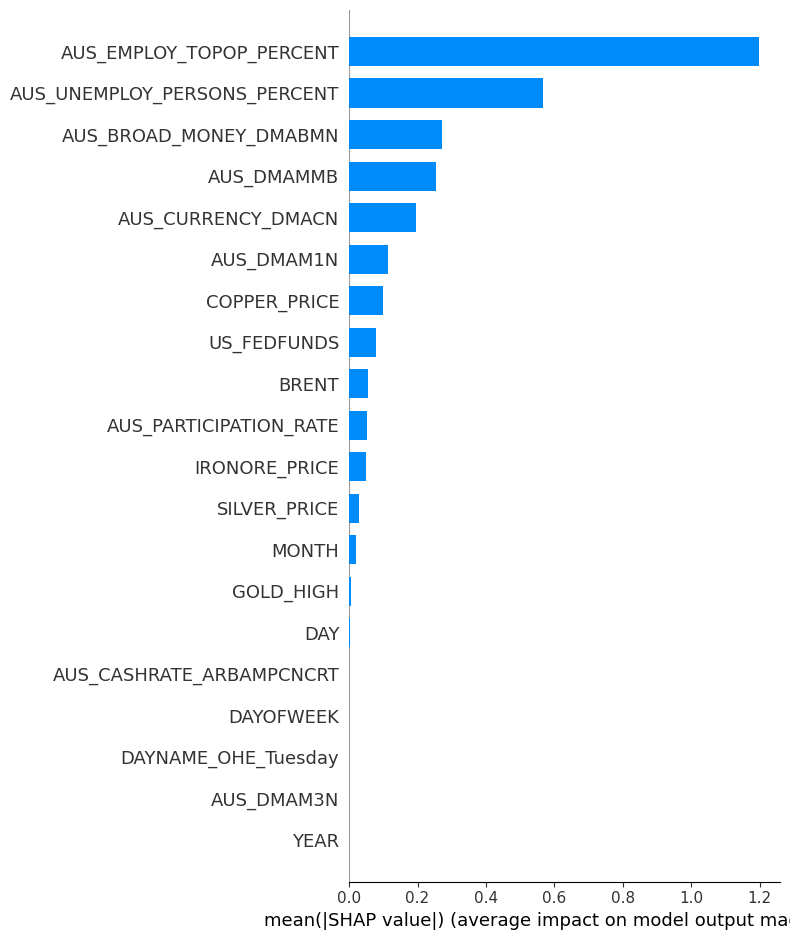

In [ ]:
# plot the feature importance
shap.summary_plot(shap_values, x_test_onehot, plot_type="bar")

# Causal Machine Learning

In [ ]:
# order feature names according to shap values
vals = np.abs(shap_values.values).mean(0)

# collect data for features importances
feature_importance = pd.DataFrame(
    list(zip(shap_values.feature_names, vals)), columns=["features", "importance"]
)


feature_importance.sort_values(by=["importance"], ascending=False, inplace=True)

# keep top k features for causal analysis
k = 13

sorted_features = feature_importance["features"]


top_k_features = list(sorted_features.values)[:20]

In [ ]:
top_k_features

['AUS_EMPLOY_TOPOP_PERCENT',
 'AUS_UNEMPLOY_PERSONS_PERCENT',
 'AUS_BROAD_MONEY_DMABMN',
 'AUS_DMAMMB',
 'AUS_CURRENCY_DMACN',
 'AUS_DMAM1N',
 'COPPER_PRICE',
 'US_FEDFUNDS',
 'BRENT',
 'AUS_PARTICIPATION_RATE',
 'IRONORE_PRICE',
 'SILVER_PRICE',
 'MONTH',
 'GOLD_HIGH',
 'DAY',
 'AUS_CASHRATE_ARBAMPCNCRT',
 'DAYOFWEEK',
 'AUS_DMAM3N',
 'AUS_GNI_TOT',
 'WTI']

In [ ]:
from econml.solutions.causal_analysis import CausalAnalysis

# initialize heterogeneity features
heterogeneous_cols = ['GOLD_HIGH', 'BRENT', 'WTI', 'US_FEDFUNDS']

In [ ]:
onehot_X.columns.to_list()

['GOLD_HIGH',
 'BRENT',
 'COPPER_PRICE',
 'IRONORE_PRICE',
 'SILVER_PRICE',
 'US_FEDFUNDS',
 'WTI',
 'AUS_GNI_TOT',
 'AUS_BROAD_MONEY_DMABMN',
 'AUS_CASHRATE_ARBAMPCNCRT',
 'AUS_CURRENCY_DMACN',
 'AUS_DMAM1N',
 'AUS_DMAM3N',
 'AUS_DMAMMB',
 'AUS_EMPLOY_TOPOP_PERCENT',
 'AUS_PARTICIPATION_RATE',
 'AUS_UNEMPLOY_PERSONS_PERCENT',
 'DAY',
 'MONTH',
 'YEAR',
 'DAYOFWEEK',
 'Intercept',
 'DAYNAME_OHE_Friday',
 'DAYNAME_OHE_Monday',
 'DAYNAME_OHE_Saturday',
 'DAYNAME_OHE_Sunday',
 'DAYNAME_OHE_Thursday',
 'DAYNAME_OHE_Tuesday',
 'DAYNAME_OHE_Wednesday']

In [ ]:
categorical_data = ['DAY',
 'MONTH',
 'YEAR',
 'DAYOFWEEK',
 'DAYNAME_OHE_Friday',
 'DAYNAME_OHE_Monday',
 'DAYNAME_OHE_Saturday',
 'DAYNAME_OHE_Sunday',
 'DAYNAME_OHE_Thursday',
 'DAYNAME_OHE_Tuesday',
 'DAYNAME_OHE_Wednesday']

In [ ]:
len(categorical_data)

In [ ]:
# create the causal machine learning model
causal_analysis = CausalAnalysis(

    #top k features
    feature_inds=top_k_features,

    # categorical data
    categorical= categorical_data,

    classification=False,
    nuisance_models="automl",
    heterogeneity_model="linear",
    n_jobs=-1,
    random_state=123,
    upper_bound_on_cat_expansion=41
)

### Run Causal Machine Learning

In [ ]:
# run casual machine learning on training data
causal_analysis.fit(x_train_onehot, y_train)

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.040e+00, tolerance: 3.592e-01
Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.453e+00, tolerance: 3.507e-01
Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.806e+00, tolerance: 3.454e-01
Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.635e+00, tolerance: 5.282e-01


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000051 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 837
[LightGBM] [Info] Number of data points in the train set: 552, number of used features: 45
[LightGBM] [Info] Start training from score 3.571558
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

# Predictions

## Predictive Population Effects of Treatments and Policies

### The Global Population Effect - Average Treatment Effect (ATE)

In [ ]:
# get global causal effect ordered by causal importance (pvalue)
global_population_effects = causal_analysis.global_causal_effect(alpha=0.05)

# sort by p-values: significant if pvalue < 0.05
global_population_effects.sort_values(by="p_value")

point        stderr         zstat  \
feature                feature_value                                         
DAY                    9v1           -0.096991  2.190660e-10 -4.427490e+08   
                       3v1            0.175764  1.149707e-10  1.528775e+09   
                       4v1            0.367411  6.687409e-11  5.494071e+09   
                       5v1           -0.194424  1.971177e-10 -9.863326e+08   
                       6v1            0.052780  2.642307e-11  1.997504e+09   
...                                        ...           ...           ...   
AUS_PARTICIPATION_RATE num           -0.222843  4.525148e-01 -4.924555e-01   
AUS_BROAD_MONEY_DMABMN num           -0.000885  2.212879e-03 -3.997369e-01   
AUS_DMAM1N             num            0.002433  7.069190e-03  3.442225e-01   
DAYOFWEEK              6v0            1.357439  5.085480e+00  2.669244e-01   
GOLD_HIGH              num           -0.000023  1.119108e-04 -2.075951e-01   

                                       p_value  ci_lower   ci_upper  
feature                feature_value                                 
DAY                    9v1            0.000000 -0.096991  -0.096991  
                       3v1            0.000000  0.175764   0.175764  
                       4v1            0.000000  0.367411   0.367411  
                       5v1            0.000000 -0.194424  -0.194424  
                       6v1            0.000000  0.052780   0.052780  
...                                        ...       ...        ...  
AUS_PARTICIPATION_RATE num            0.622397 -1.109756   0.664069  
AUS_BROAD_MONEY_DMABMN num            0.689350 -0.005222   0.003453  
AUS_DMAM1N             num            0.730679 -0.011422   0.016289  
DAYOFWEEK              6v0            0.789527 -8.609919  11.324797  
GOLD_HIGH              num            0.835545 -0.000243   0.000196  

[64 rows x 6 columns]

In [ ]:
global_population_effects

point    stderr      zstat  \
feature                      feature_value                                    
AUS_EMPLOY_TOPOP_PERCENT     num             -0.454622  0.806504  -0.563694   
AUS_UNEMPLOY_PERSONS_PERCENT num             -0.943296  0.682367  -1.382388   
AUS_BROAD_MONEY_DMABMN       num             -0.000885  0.002213  -0.399737   
AUS_DMAMMB                   num              0.012514  0.004118   3.038443   
AUS_CURRENCY_DMACN           num              0.051897  0.085740   0.605283   
...                                                ...       ...        ...   
DAYOFWEEK                    5v0           -150.243806  5.560035 -27.022095   
                             6v0              1.357439  5.085480   0.266924   
AUS_DMAM3N                   num              0.007414  0.006709   1.105209   
AUS_GNI_TOT                  num             -0.000007  0.000006  -1.242571   
WTI                          num              0.505410  0.092943   5.437837   

                                                  p_value    ci_lower  \
feature                      feature_value                              
AUS_EMPLOY_TOPOP_PERCENT     num             5.729622e-01   -2.035342   
AUS_UNEMPLOY_PERSONS_PERCENT num             1.668525e-01   -2.280710   
AUS_BROAD_MONEY_DMABMN       num             6.893503e-01   -0.005222   
AUS_DMAMMB                   num             2.378041e-03    0.004442   
AUS_CURRENCY_DMACN           num             5.449907e-01   -0.116150   
...                                                   ...         ...   
DAYOFWEEK                    5v0            8.130207e-161 -161.141275   
                             6v0             7.895274e-01   -8.609919   
AUS_DMAM3N                   num             2.690689e-01   -0.005734   
AUS_GNI_TOT                  num             2.140261e-01   -0.000018   
WTI                          num             5.393124e-08    0.323245   

                                              ci_upper  \
feature                      feature_value               
AUS_EMPLOY_TOPOP_PERCENT     num              1.126098   
AUS_UNEMPLOY_PERSONS_PERCENT num              0.394118   
AUS_BROAD_MONEY_DMABMN       num              0.003453   
AUS_DMAMMB                   num              0.020586   
AUS_CURRENCY_DMACN           num              0.219944   
...                                                ...   
DAYOFWEEK                    5v0           -139.346337   
                             6v0             11.324797   
AUS_DMAM3N                   num              0.020563   
AUS_GNI_TOT                  num              0.000004   
WTI                          num              0.687576   

                                                                        FEATURE  
feature                      feature_value                                       
AUS_EMPLOY_TOPOP_PERCENT     num                (AUS_EMPLOY_TOPOP_PERCENT, num)  
AUS_UNEMPLOY_PERSONS_PERCENT num            (AUS_UNEMPLOY_PERSONS_PERCENT, num)  
AUS_BROAD_MONEY_DMABMN       num                  (AUS_BROAD_MONEY_DMABMN, num)  
AUS_DMAMMB                   num                              (AUS_DMAMMB, num)  
AUS_CURRENCY_DMACN           num                      (AUS_CURRENCY_DMACN, num)  
...                                                                         ...  
DAYOFWEEK                    5v0                               (DAYOFWEEK, 5v0)  
                             6v0                               (DAYOFWEEK, 6v0)  
AUS_DMAM3N                   num                              (AUS_DMAM3N, num)  
AUS_GNI_TOT                  num                             (AUS_GNI_TOT, num)  
WTI                          num                                     (WTI, num)  

[64 rows x 7 columns]

In [ ]:
global_population_effects['FEATURE'] = global_population_effects.index

In [ ]:
global_population_effects

point    stderr      zstat  \
feature                      feature_value                                    
AUS_EMPLOY_TOPOP_PERCENT     num             -0.454622  0.806504  -0.563694   
AUS_UNEMPLOY_PERSONS_PERCENT num             -0.943296  0.682367  -1.382388   
AUS_BROAD_MONEY_DMABMN       num             -0.000885  0.002213  -0.399737   
AUS_DMAMMB                   num              0.012514  0.004118   3.038443   
AUS_CURRENCY_DMACN           num              0.051897  0.085740   0.605283   
...                                                ...       ...        ...   
DAYOFWEEK                    5v0           -150.243806  5.560035 -27.022095   
                             6v0              1.357439  5.085480   0.266924   
AUS_DMAM3N                   num              0.007414  0.006709   1.105209   
AUS_GNI_TOT                  num             -0.000007  0.000006  -1.242571   
WTI                          num              0.505410  0.092943   5.437837   

                                                  p_value    ci_lower  \
feature                      feature_value                              
AUS_EMPLOY_TOPOP_PERCENT     num             5.729622e-01   -2.035342   
AUS_UNEMPLOY_PERSONS_PERCENT num             1.668525e-01   -2.280710   
AUS_BROAD_MONEY_DMABMN       num             6.893503e-01   -0.005222   
AUS_DMAMMB                   num             2.378041e-03    0.004442   
AUS_CURRENCY_DMACN           num             5.449907e-01   -0.116150   
...                                                   ...         ...   
DAYOFWEEK                    5v0            8.130207e-161 -161.141275   
                             6v0             7.895274e-01   -8.609919   
AUS_DMAM3N                   num             2.690689e-01   -0.005734   
AUS_GNI_TOT                  num             2.140261e-01   -0.000018   
WTI                          num             5.393124e-08    0.323245   

                                              ci_upper  \
feature                      feature_value               
AUS_EMPLOY_TOPOP_PERCENT     num              1.126098   
AUS_UNEMPLOY_PERSONS_PERCENT num              0.394118   
AUS_BROAD_MONEY_DMABMN       num              0.003453   
AUS_DMAMMB                   num              0.020586   
AUS_CURRENCY_DMACN           num              0.219944   
...                                                ...   
DAYOFWEEK                    5v0           -139.346337   
                             6v0             11.324797   
AUS_DMAM3N                   num              0.020563   
AUS_GNI_TOT                  num              0.000004   
WTI                          num              0.687576   

                                                                        FEATURE  
feature                      feature_value                                       
AUS_EMPLOY_TOPOP_PERCENT     num                (AUS_EMPLOY_TOPOP_PERCENT, num)  
AUS_UNEMPLOY_PERSONS_PERCENT num            (AUS_UNEMPLOY_PERSONS_PERCENT, num)  
AUS_BROAD_MONEY_DMABMN       num                  (AUS_BROAD_MONEY_DMABMN, num)  
AUS_DMAMMB                   num                              (AUS_DMAMMB, num)  
AUS_CURRENCY_DMACN           num                      (AUS_CURRENCY_DMACN, num)  
...                                                                         ...  
DAYOFWEEK                    5v0                               (DAYOFWEEK, 5v0)  
                             6v0                               (DAYOFWEEK, 6v0)  
AUS_DMAM3N                   num                              (AUS_DMAM3N, num)  
AUS_GNI_TOT                  num                             (AUS_GNI_TOT, num)  
WTI                          num                                     (WTI, num)  

[64 rows x 7 columns]

In [ ]:
global_population_effects.to_csv('./datasets/dgea_global_population_effects.csv', index=False)

In [ ]:
# helper function to plot error bar
def errorbar(res):
    xticks = res.index.get_level_values(0)
    lowererr = res["point"] - res["ci_lower"]
    uppererr = res["ci_upper"] - res["point"]
    xticks = [
        "{}***".format(t)
        if p < 1e-6
        else ("{}**".format(t) if p < 1e-3 else ("{}*".format(t) if p < 1e-2 else t))
        for t, p in zip(xticks, res["p_value"])
    ]
    plot_title = "Direct Causal Effect of Each Feature with 95% Confidence Interval, "
    plt.figure(figsize=(50, 20))
    plt.errorbar(
        np.arange(len(xticks)),
        res["point"],
        yerr=[lowererr, uppererr],
        fmt="o",
        capsize=5,
        capthick=1,
        barsabove=True,
    )
    plt.xticks(np.arange(len(xticks)), xticks, rotation=45)
    plt.title(plot_title)
    plt.axhline(0, color="r", linestyle="--", alpha=0.5)
    plt.ylabel("Average Treatment Effect")

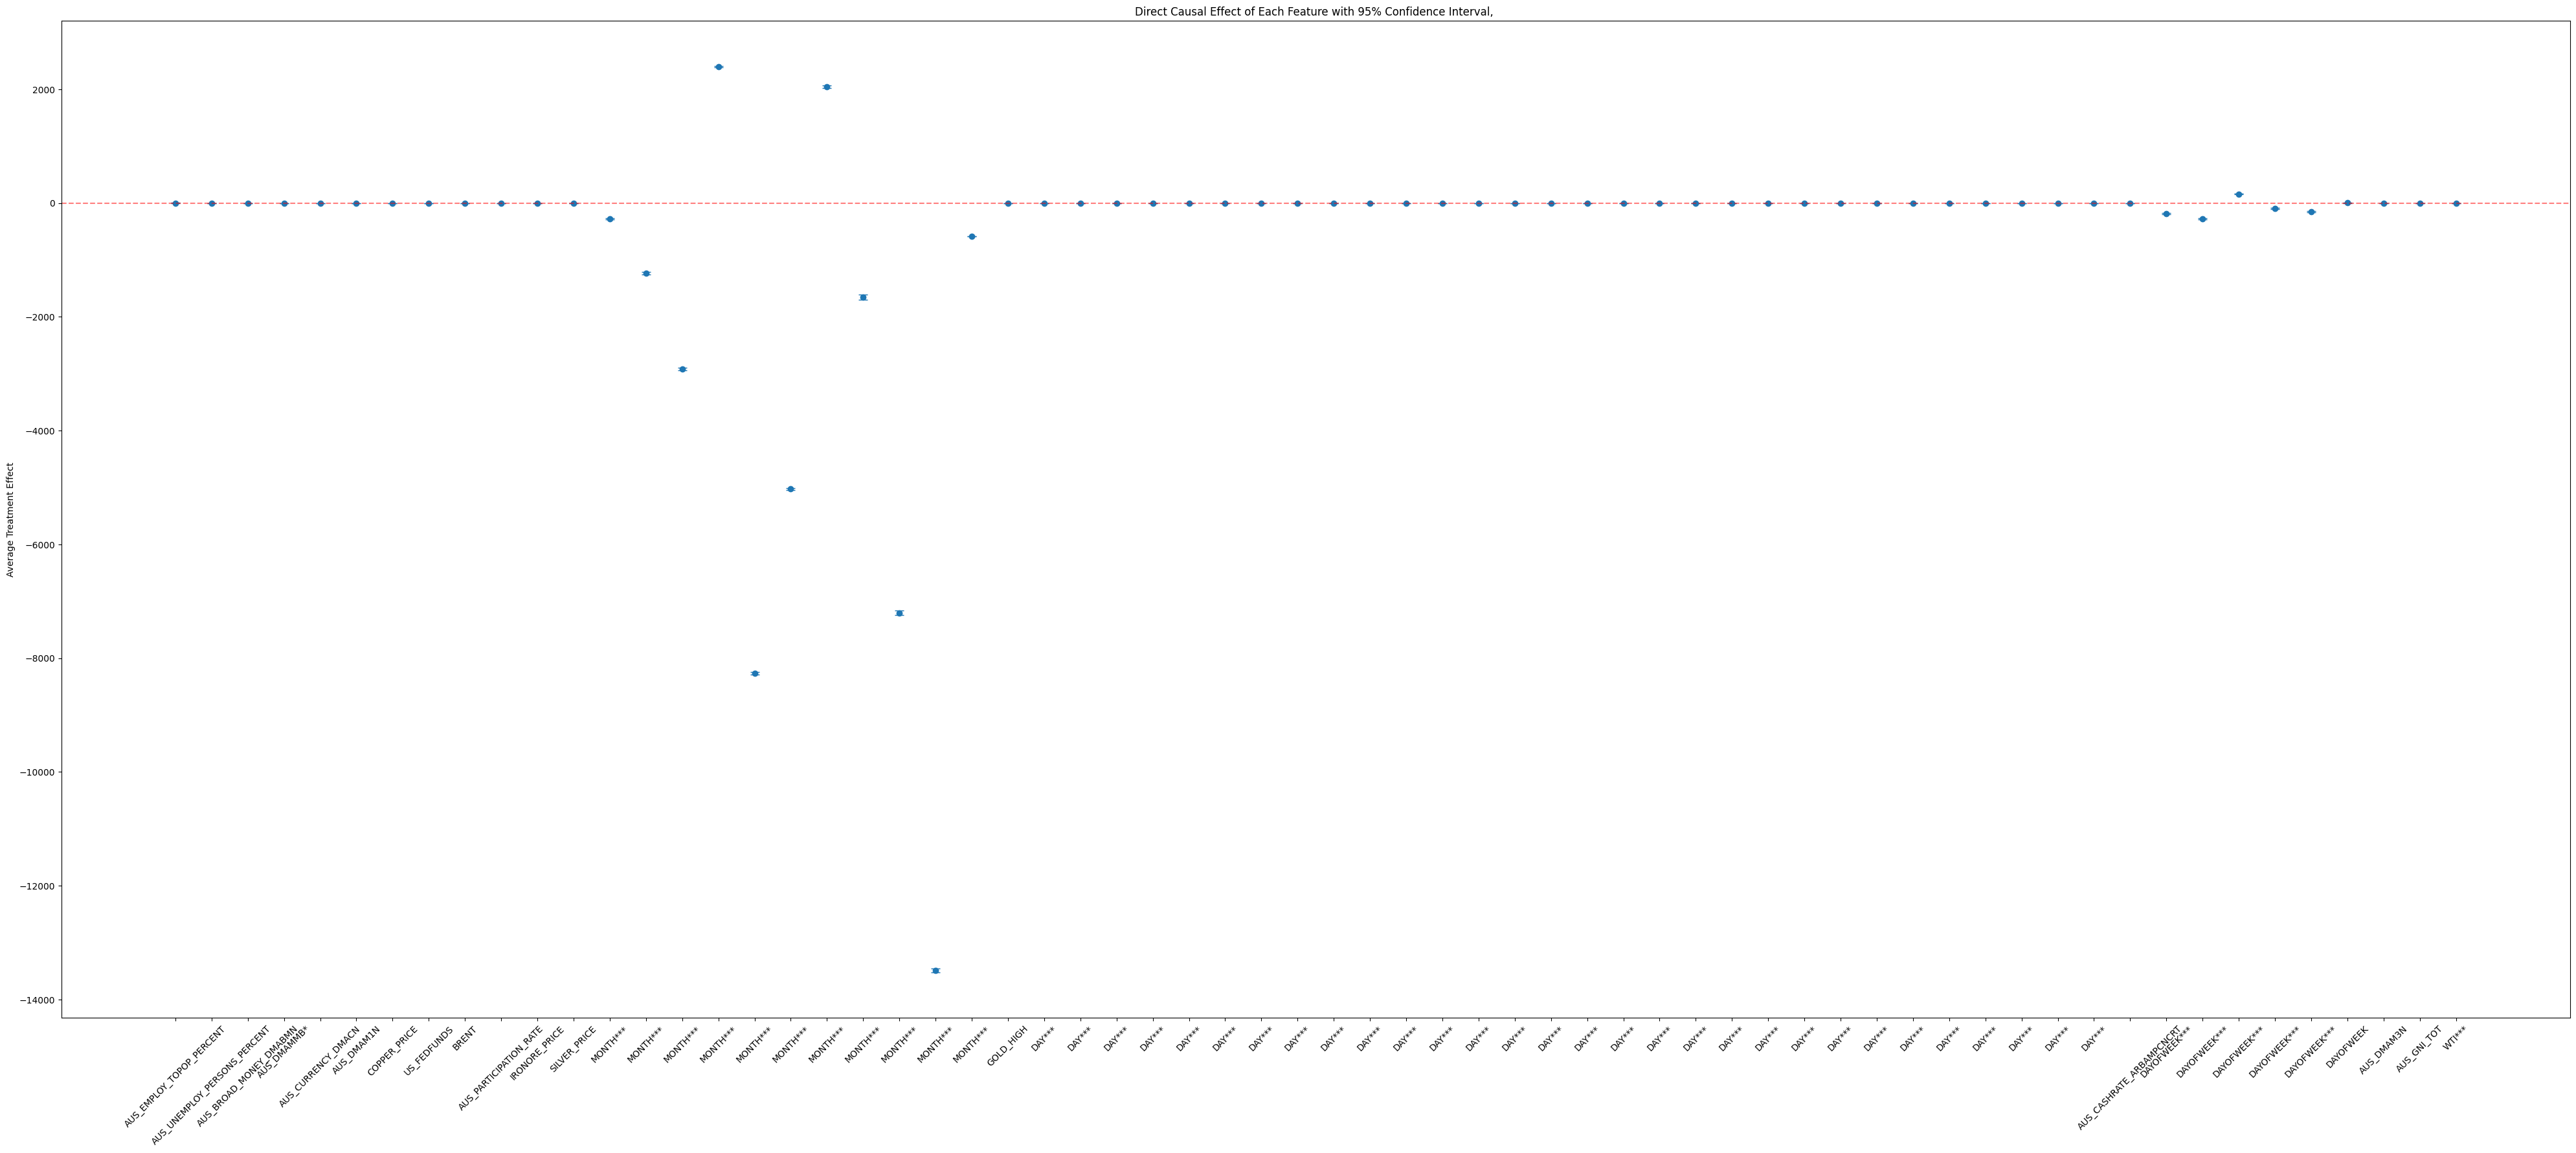

In [ ]:
%matplotlib inline
errorbar(global_population_effects)

In [ ]:
# initialize heterogeneity features
from econml.solutions.causal_analysis import CausalAnalysis

# initialize heterogeneity features
heterogeneous_cols = ['GOLD_HIGH', 'BRENT', 'WTI', 'US_FEDFUNDS']

In [ ]:
# create the causal machine learning model
causal_analysis_hetero = CausalAnalysis(

    #top k features
    feature_inds=top_k_features,

    heterogeneity_inds=['GOLD_HIGH', 'BRENT', 'WTI', 'US_FEDFUNDS'],

    # categorical data
    categorical= categorical_data,

    classification=False,
    nuisance_models="automl",
    heterogeneity_model="linear",
    n_jobs=-1,
    random_state=123,
    upper_bound_on_cat_expansion=41
)

In [ ]:
# run casual machine learning on training data
causal_analysis_hetero.fit(x_train_onehot, y_train)

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.040e+00, tolerance: 3.592e-01
Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.453e+00, tolerance: 3.507e-01
Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.806e+00, tolerance: 3.454e-01
Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.635e+00, tolerance: 5.282e-01


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000166 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 837
[LightGBM] [Info] Number of data points in the train set: 552, number of used features: 45
[LightGBM] [Info] Start training from score 3.571558
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

In [ ]:
# get global causal effect ordered by causal importance (pvalue)
global_population_effects_hetero = causal_analysis_hetero.global_causal_effect(alpha=0.05)


global_population_effects_hetero.sort_values(by="p_value")

point      stderr     zstat  \
feature                feature_value                                      
MONTH                  8v1            -420.823591  131.271756 -3.205744   
                       4v1           -1539.780426  549.238935 -2.803480   
IRONORE_PRICE          num               0.007684    0.002840  2.705359   
MONTH                  12v1          -1088.410992  415.717866 -2.618148   
                       3v1            -484.479106  208.921105 -2.318957   
...                                           ...         ...       ...   
AUS_BROAD_MONEY_DMABMN num              -0.000122    0.001794 -0.068059   
DAY                    18v1              0.000235    0.004203  0.055946   
                       28v1              0.000131    0.018610  0.007056   
                       26v1              0.000028    0.004172  0.006702   
                       15v1              0.000007    0.003915  0.001748   

                                       p_value     ci_lower    ci_upper  
feature                feature_value                                     
MONTH                  8v1            0.001347  -678.111505 -163.535676  
                       4v1            0.005055 -2616.268957 -463.291895  
IRONORE_PRICE          num            0.006823     0.002117    0.013250  
MONTH                  12v1           0.008841 -1903.203037 -273.618946  
                       3v1            0.020397  -893.956947  -75.001265  
...                                        ...          ...         ...  
AUS_BROAD_MONEY_DMABMN num            0.945739    -0.003639    0.003394  
DAY                    18v1           0.955385    -0.008003    0.008473  
                       28v1           0.994370    -0.036345    0.036607  
                       26v1           0.994653    -0.008149    0.008205  
                       15v1           0.998605    -0.007667    0.007680  

[64 rows x 6 columns]

In [ ]:
global_population_effects_hetero.to_csv('./datasets/dgea_global_population_effects_hetero.csv', index=False)

In [ ]:
errorbar(global_population_effects_hetero)

# What are the causal factors?

# What IF Analysis

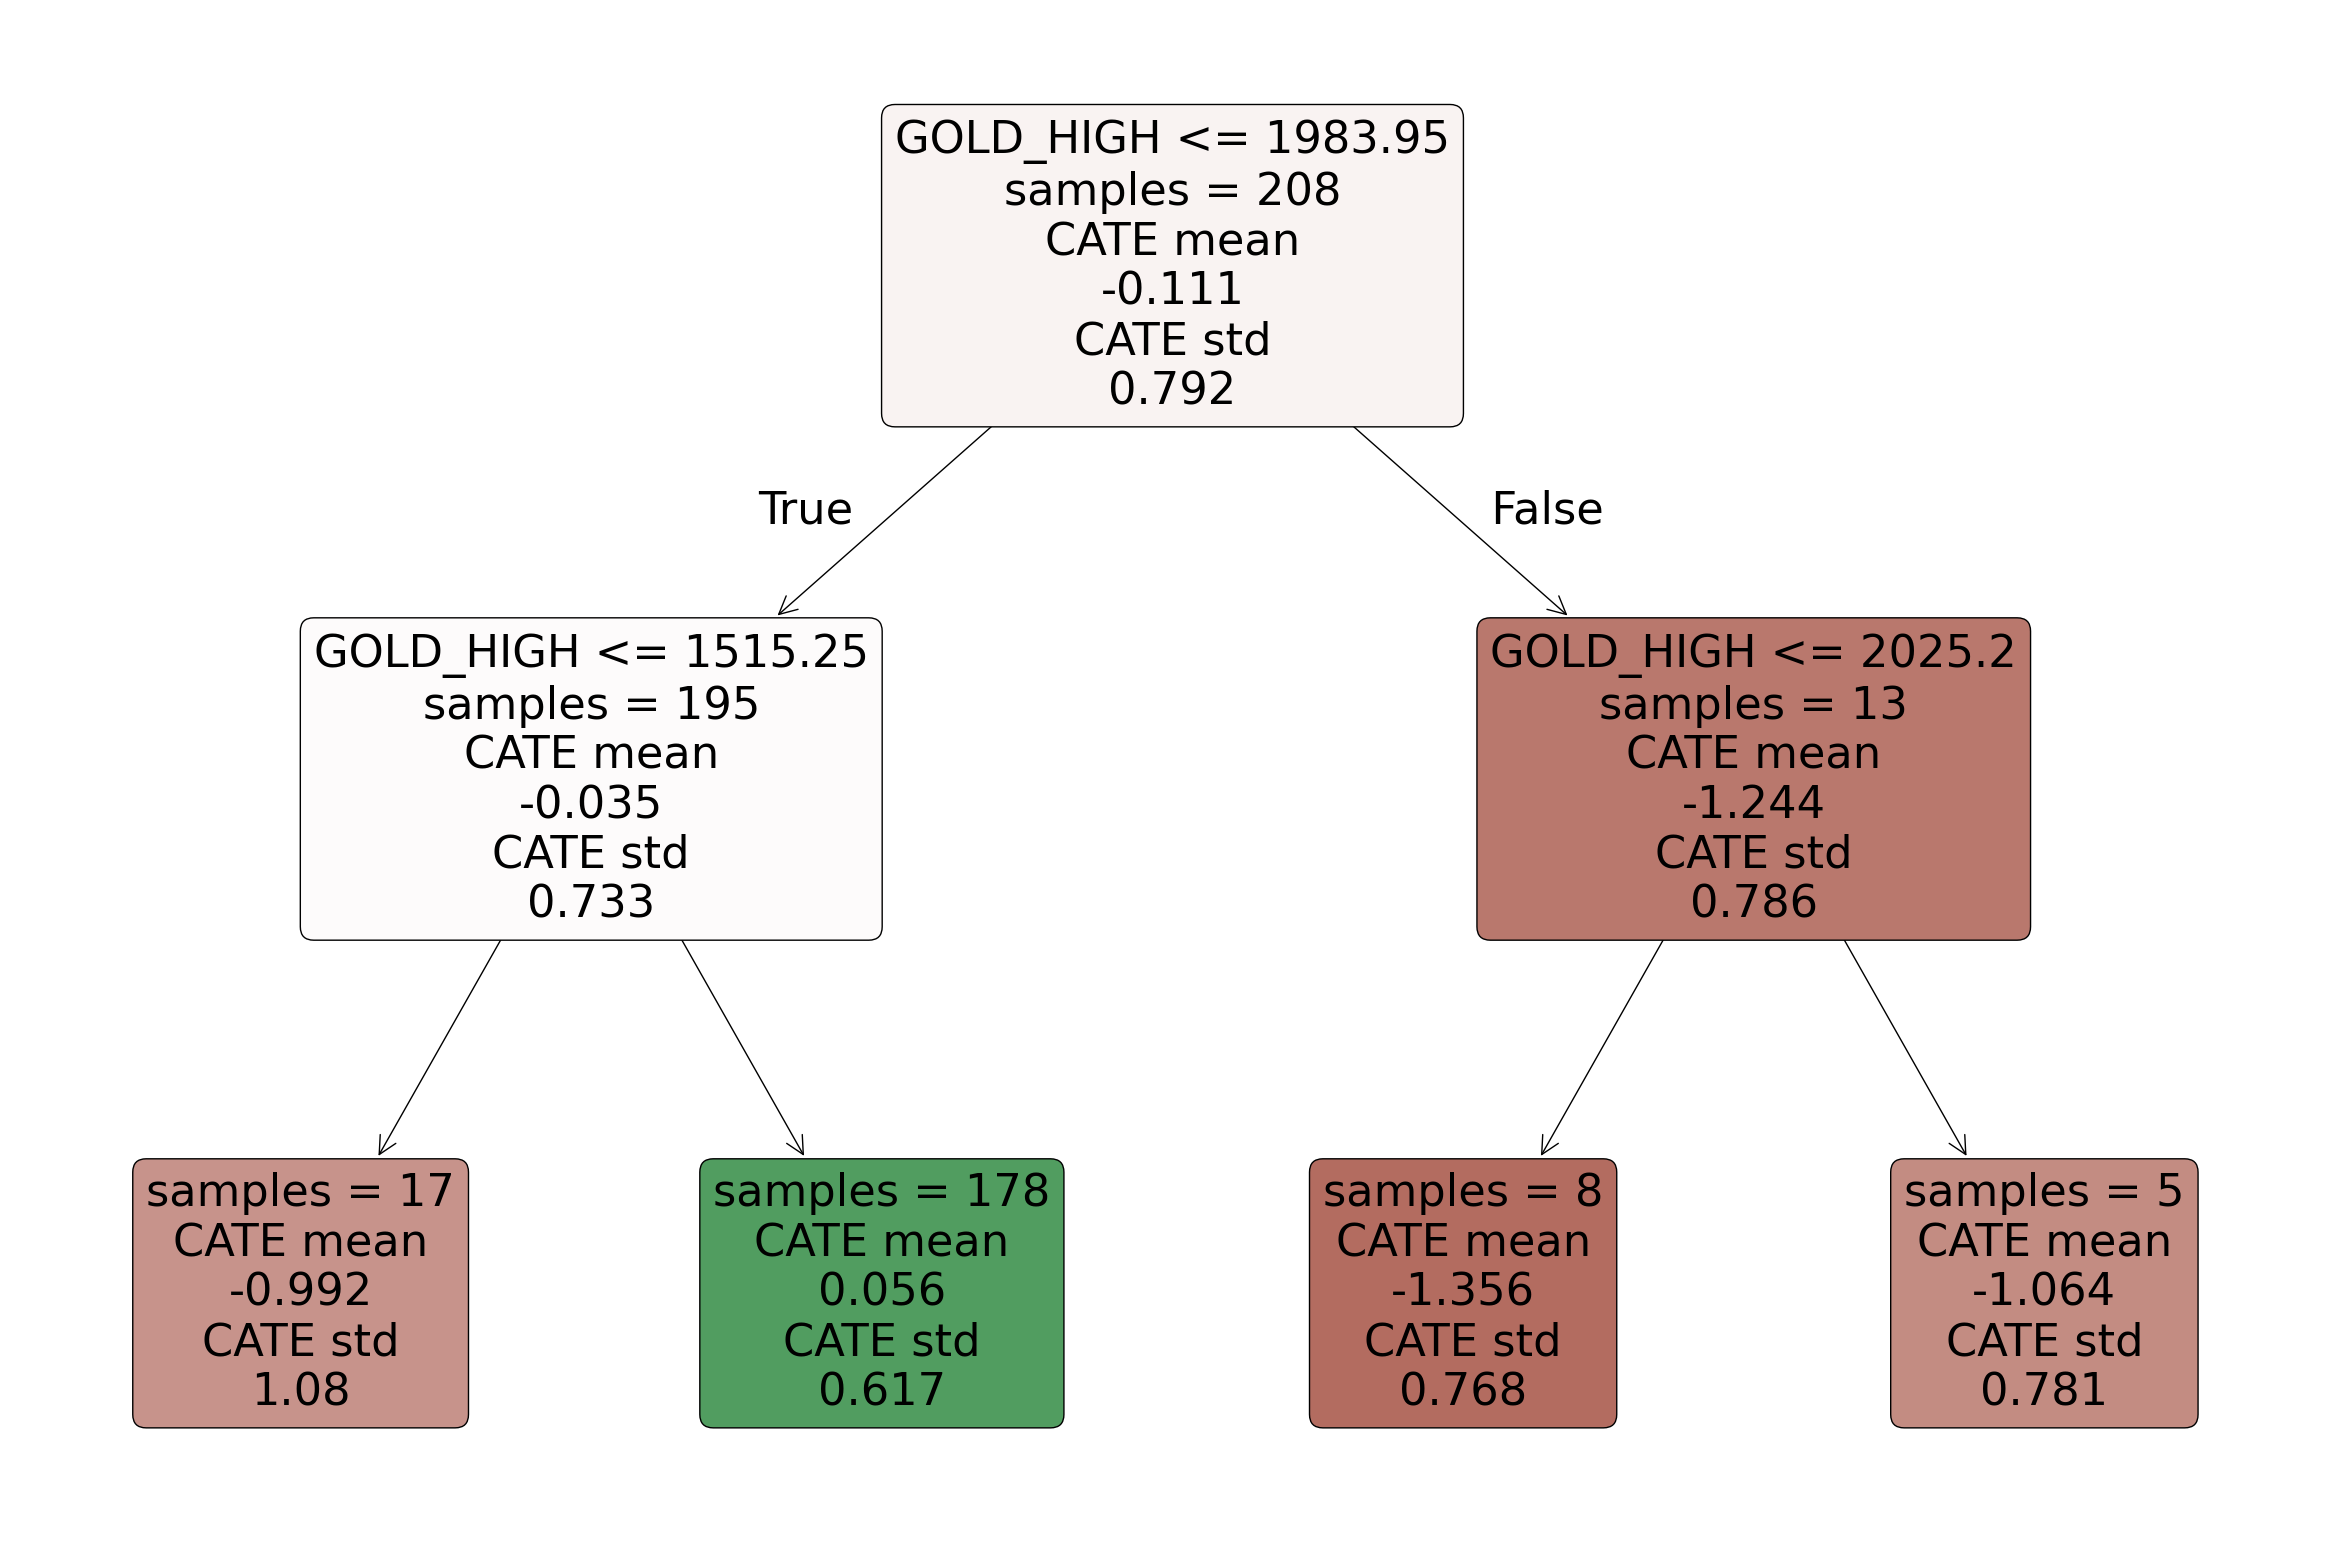

In [ ]:
plt.figure(figsize=(30, 20))


causal_analysis.plot_heterogeneity_tree(
    x_test_onehot,
    "SILVER_PRICE",
    max_depth=2,
    min_impurity_decrease=1e-6,
    min_samples_leaf = 5
)

**What is a tretment cost and how it applies to the code/ graph bellow ?**


That part of the code will look at the Crude Oil (WTI) feature which is chosen as the treatment in this case.

The default treatment cost is 0, but that is not really the case as each treatment has some cost associated with it.

In this case the cost was set to be 2500. It is just an average estimate of how much it will cost to get a certain quantity of it.

For example, lets say that we saw year the oil consumption was on average 5700l.

This cost is calculated as:  $70 per barrel ( 160 l )

5700 /160 = 35 * $70 = $2450 + $50 taxes etc = estimate of 2500.

It really can be any value that we estimate the cost of implementing the treatment to be.

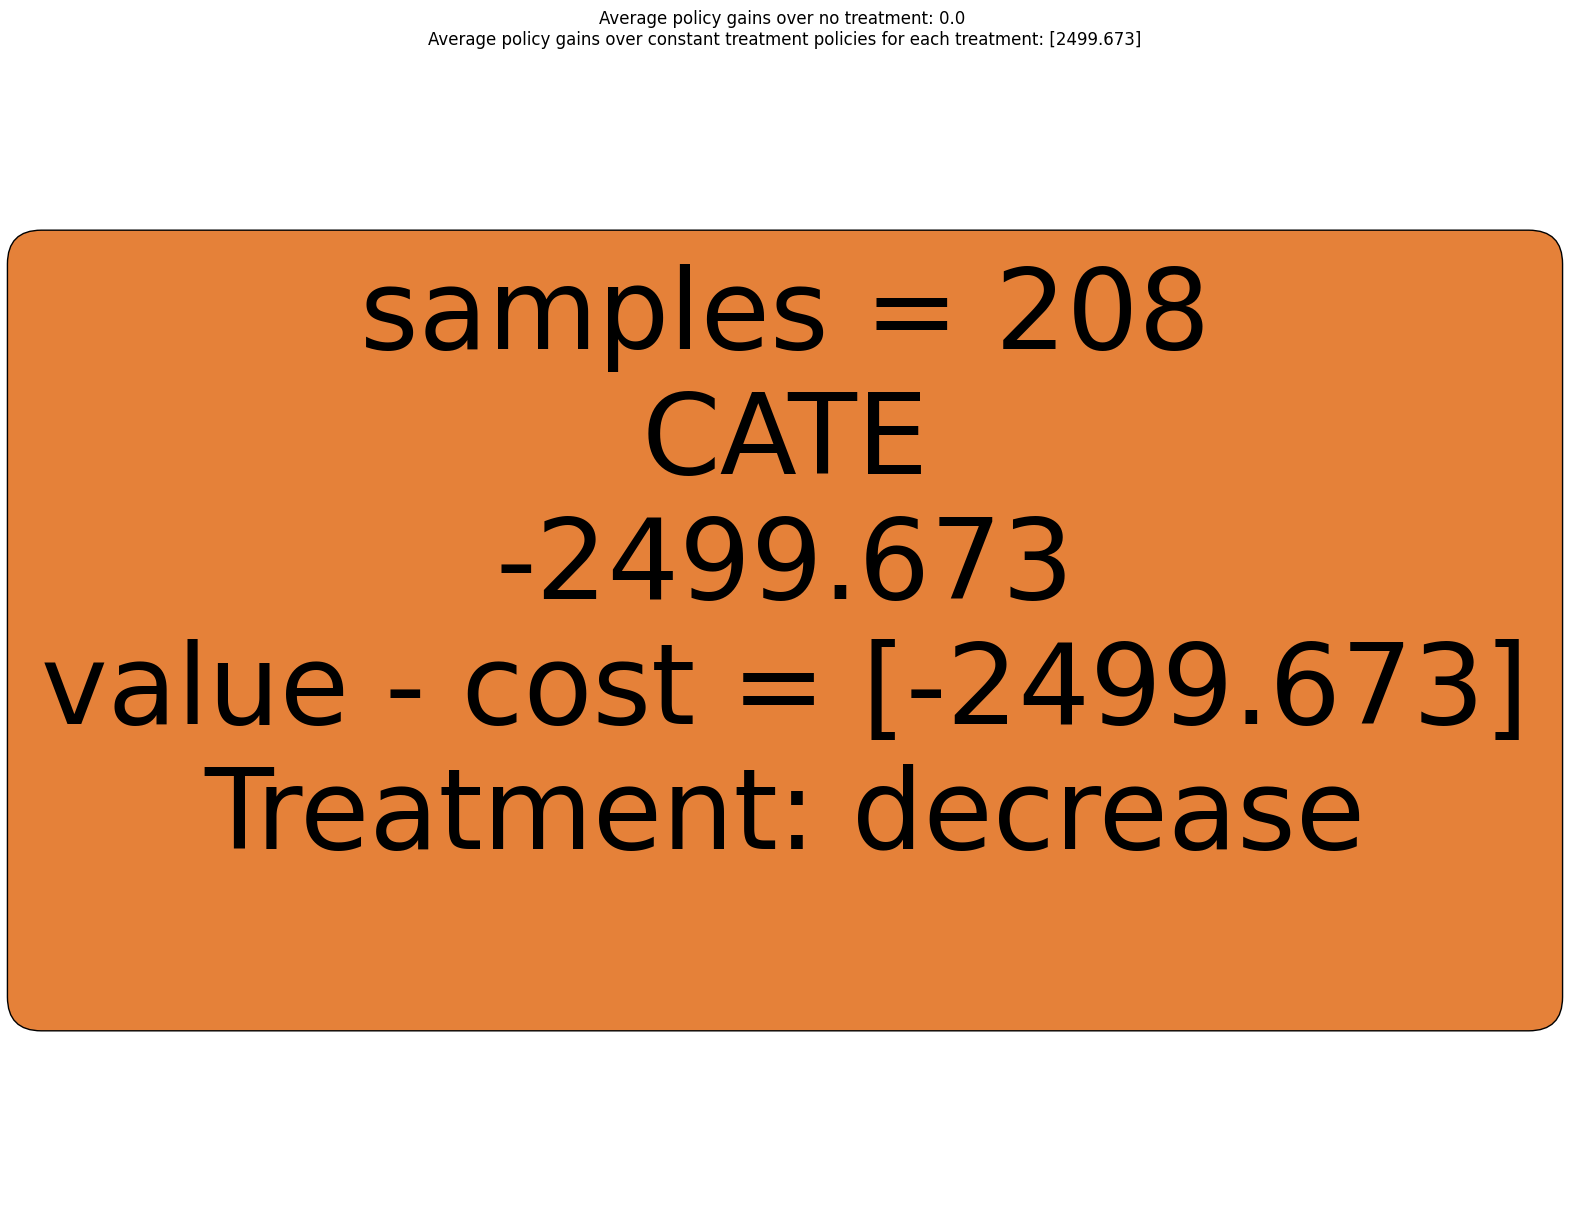

In [ ]:
plt.figure(figsize=(20, 15))


causal_analysis.plot_policy_tree(
    x_test_onehot,
    "WTI",
    treatment_costs=2500,
    max_depth=2,
    min_samples_leaf = 5
)

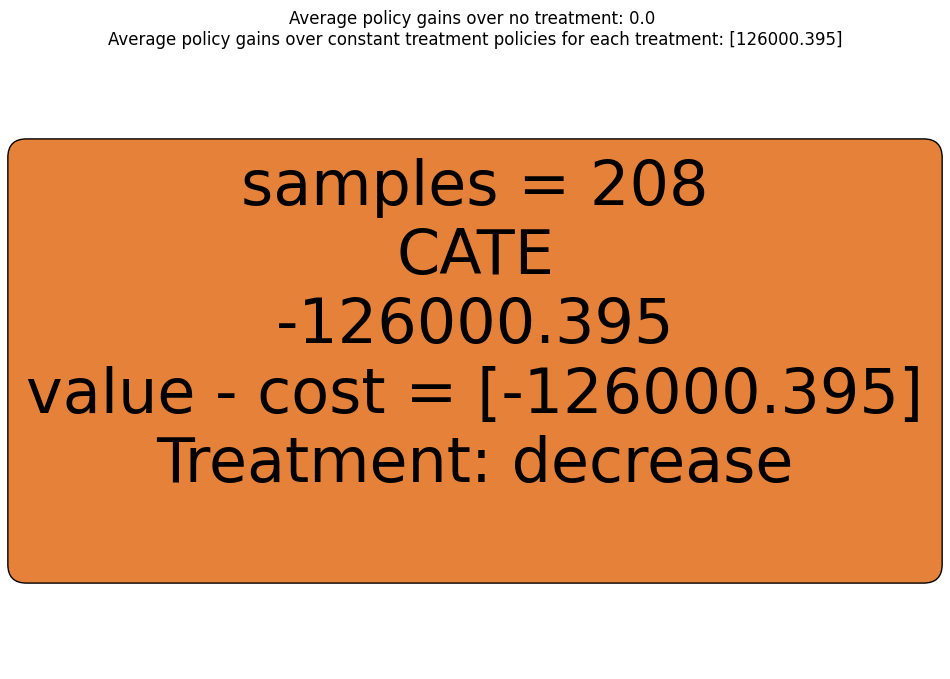

In [ ]:
plt.figure(figsize=(12, 8))


causal_analysis.plot_policy_tree(
    x_test_onehot,
    "US_FEDFUNDS",
    treatment_costs=126000,
    max_depth=2,
    min_samples_leaf = 5
)